##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic text classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/text_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates text classification starting from plain text files stored on disk. You'll train a binary classifier to perform sentiment analysis on an IMDB dataset. At the end of the notebook, there is an exercise for you to try, in which you'll train a multiclass classifier to predict the tag for a programming question on Stack Overflow.


In [3]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [4]:
print(tf.__version__)

2.4.1


## Sentiment analysis

This notebook trains a sentiment analysis model to classify movie reviews as *positive* or *negative*, based on the text of the review. This is an example of *binary*—or two-class—classification, an important and widely applicable kind of machine learning problem.

You'll use the [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/) that contains the text of 50,000 movie reviews from the [Internet Movie Database](https://www.imdb.com/). These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are *balanced*, meaning they contain an equal number of positive and negative reviews.


### Download and explore the IMDB dataset

Let's download and extract the dataset, then explore the directory structure.

In [5]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

    8192/84125825 [..............................] - ETA: 23:02

   24576/84125825 [..............................] - ETA: 15:21

   40960/84125825 [..............................] - ETA: 13:49

   73728/84125825 [..............................] - ETA: 10:14

  106496/84125825 [..............................] - ETA: 8:51 

  139264/84125825 [..............................] - ETA: 8:07

  188416/84125825 [..............................] - ETA: 7:00

  253952/84125825 [..............................] - ETA: 5:56

  319488/84125825 [..............................] - ETA: 5:18

  417792/84125825 [..............................] - ETA: 4:30

  516096/84125825 [..............................] - ETA: 4:00

  630784/84125825 [..............................] - ETA: 3:34

  761856/84125825 [..............................] - ETA: 3:11

  909312/84125825 [..............................] - ETA: 2:52

 1105920/84125825 [..............................] - ETA: 2:31

 1187840/84125825 [..............................] - ETA: 2:30

 1515520/84125825 [..............................] - ETA: 2:05

 1712128/84125825 [..............................] - ETA: 1:56

 1892352/84125825 [..............................] - ETA: 1:51

 2088960/84125825 [..............................] - ETA: 1:45

 2285568/84125825 [..............................] - ETA: 1:41

 2498560/84125825 [..............................] - ETA: 1:36

 2695168/84125825 [..............................] - ETA: 1:33

 2908160/84125825 [>.............................] - ETA: 1:30

 3137536/84125825 [>.............................] - ETA: 1:27

 3350528/84125825 [>.............................] - ETA: 1:24

 3579904/84125825 [>.............................] - ETA: 1:21

 3809280/84125825 [>.............................] - ETA: 1:19

 4038656/84125825 [>.............................] - ETA: 1:17

 4284416/84125825 [>.............................] - ETA: 1:15

 4513792/84125825 [>.............................] - ETA: 1:13

 4759552/84125825 [>.............................] - ETA: 1:12

 5005312/84125825 [>.............................] - ETA: 1:10

 5136384/84125825 [>.............................] - ETA: 1:10

 5414912/84125825 [>.............................] - ETA: 1:08

 5578752/84125825 [>.............................] - ETA: 1:08

 5758976/84125825 [=>............................] - ETA: 1:07

 5939200/84125825 [=>............................] - ETA: 1:07

 6119424/84125825 [=>............................] - ETA: 1:07

 6299648/84125825 [=>............................] - ETA: 1:06

 6496256/84125825 [=>............................] - ETA: 1:06

 6676480/84125825 [=>............................] - ETA: 1:05

 6873088/84125825 [=>............................] - ETA: 1:05

 7069696/84125825 [=>............................] - ETA: 1:04

 7266304/84125825 [=>............................] - ETA: 1:04

 7462912/84125825 [=>............................] - ETA: 1:03

 7659520/84125825 [=>............................] - ETA: 1:03

 7856128/84125825 [=>............................] - ETA: 1:02

 8052736/84125825 [=>............................] - ETA: 1:02

 8265728/84125825 [=>............................] - ETA: 1:01

 8462336/84125825 [==>...........................] - ETA: 1:01

 8658944/84125825 [==>...........................] - ETA: 1:00

 8839168/84125825 [==>...........................] - ETA: 1:00

 8871936/84125825 [==>...........................] - ETA: 1:00

 9084928/84125825 [==>...........................] - ETA: 1:00

 9281536/84125825 [==>...........................] - ETA: 59s 

 9494528/84125825 [==>...........................] - ETA: 59s

 9691136/84125825 [==>...........................] - ETA: 58s

 9871360/84125825 [==>...........................] - ETA: 58s

 9904128/84125825 [==>...........................] - ETA: 58s

10117120/84125825 [==>...........................] - ETA: 58s

10313728/84125825 [==>...........................] - ETA: 58s

10641408/84125825 [==>...........................] - ETA: 57s

10674176/84125825 [==>...........................] - ETA: 57s

10821632/84125825 [==>...........................] - ETA: 57s

10969088/84125825 [==>...........................] - ETA: 57s

11100160/84125825 [==>...........................] - ETA: 57s

11132928/84125825 [==>...........................] - ETA: 57s

11296768/84125825 [===>..........................] - ETA: 57s

11460608/84125825 [===>..........................] - ETA: 57s

11567104/84125825 [===>..........................] - ETA: 56s

11624448/84125825 [===>..........................] - ETA: 56s

11739136/84125825 [===>..........................] - ETA: 56s

11804672/84125825 [===>..........................] - ETA: 56s

11911168/84125825 [===>..........................] - ETA: 56s

11984896/84125825 [===>..........................] - ETA: 56s

12099584/84125825 [===>..........................] - ETA: 56s

12165120/84125825 [===>..........................] - ETA: 56s

12279808/84125825 [===>..........................] - ETA: 56s

12345344/84125825 [===>..........................] - ETA: 56s

12460032/84125825 [===>..........................] - ETA: 55s

12541952/84125825 [===>..........................] - ETA: 55s

12656640/84125825 [===>..........................] - ETA: 55s

12722176/84125825 [===>..........................] - ETA: 55s

12836864/84125825 [===>..........................] - ETA: 55s

12918784/84125825 [===>..........................] - ETA: 55s

13033472/84125825 [===>..........................] - ETA: 55s

13115392/84125825 [===>..........................] - ETA: 55s

13230080/84125825 [===>..........................] - ETA: 54s

13312000/84125825 [===>..........................] - ETA: 55s

13443072/84125825 [===>..........................] - ETA: 54s

13508608/84125825 [===>..........................] - ETA: 54s

13639680/84125825 [===>..........................] - ETA: 54s

13705216/84125825 [===>..........................] - ETA: 54s

13819904/84125825 [===>..........................] - ETA: 54s

13901824/84125825 [===>..........................] - ETA: 54s

14032896/84125825 [====>.........................] - ETA: 53s

14098432/84125825 [====>.........................] - ETA: 54s

14229504/84125825 [====>.........................] - ETA: 53s

14311424/84125825 [====>.........................] - ETA: 53s

14442496/84125825 [====>.........................] - ETA: 53s

14508032/84125825 [====>.........................] - ETA: 53s

14639104/84125825 [====>.........................] - ETA: 53s

14721024/84125825 [====>.........................] - ETA: 53s

14852096/84125825 [====>.........................] - ETA: 52s

14917632/84125825 [====>.........................] - ETA: 52s

15048704/84125825 [====>.........................] - ETA: 52s

15130624/84125825 [====>.........................] - ETA: 52s

15261696/84125825 [====>.........................] - ETA: 52s

15327232/84125825 [====>.........................] - ETA: 52s

15474688/84125825 [====>.........................] - ETA: 52s

15540224/84125825 [====>.........................] - ETA: 52s

15671296/84125825 [====>.........................] - ETA: 51s

15753216/84125825 [====>.........................] - ETA: 51s

15884288/84125825 [====>.........................] - ETA: 51s

15949824/84125825 [====>.........................] - ETA: 51s

16097280/84125825 [====>.........................] - ETA: 51s

16162816/84125825 [====>.........................] - ETA: 51s

16310272/84125825 [====>.........................] - ETA: 51s

16375808/84125825 [====>.........................] - ETA: 51s

16523264/84125825 [====>.........................] - ETA: 50s

16572416/84125825 [====>.........................] - ETA: 50s

16719872/84125825 [====>.........................] - ETA: 50s

16785408/84125825 [====>.........................] - ETA: 50s

16932864/84125825 [=====>........................] - ETA: 50s

16998400/84125825 [=====>........................] - ETA: 50s

17145856/84125825 [=====>........................] - ETA: 50s

17211392/84125825 [=====>........................] - ETA: 50s

17358848/84125825 [=====>........................] - ETA: 49s

17408000/84125825 [=====>........................] - ETA: 49s

17555456/84125825 [=====>........................] - ETA: 49s

17620992/84125825 [=====>........................] - ETA: 49s

17768448/84125825 [=====>........................] - ETA: 49s

17833984/84125825 [=====>........................] - ETA: 49s

17997824/84125825 [=====>........................] - ETA: 49s

18046976/84125825 [=====>........................] - ETA: 49s

18194432/84125825 [=====>........................] - ETA: 49s

18259968/84125825 [=====>........................] - ETA: 49s

18423808/84125825 [=====>........................] - ETA: 48s

18456576/84125825 [=====>........................] - ETA: 48s

18620416/84125825 [=====>........................] - ETA: 48s

18669568/84125825 [=====>........................] - ETA: 48s

18817024/84125825 [=====>........................] - ETA: 48s

18882560/84125825 [=====>........................] - ETA: 48s

19062784/84125825 [=====>........................] - ETA: 48s

19095552/84125825 [=====>........................] - ETA: 48s

19292160/84125825 [=====>........................] - ETA: 47s

19439616/84125825 [=====>........................] - ETA: 47s

19505152/84125825 [=====>........................] - ETA: 47s

19685376/84125825 [======>.......................] - ETA: 47s

19718144/84125825 [======>.......................] - ETA: 47s

19898368/84125825 [======>.......................] - ETA: 47s

20029440/84125825 [======>.......................] - ETA: 47s

20111360/84125825 [======>.......................] - ETA: 47s

20242432/84125825 [======>.......................] - ETA: 46s

20324352/84125825 [======>.......................] - ETA: 46s

20455424/84125825 [======>.......................] - ETA: 46s

20537344/84125825 [======>.......................] - ETA: 46s

20668416/84125825 [======>.......................] - ETA: 46s

20750336/84125825 [======>.......................] - ETA: 46s

20881408/84125825 [======>.......................] - ETA: 46s

20963328/84125825 [======>.......................] - ETA: 46s

21094400/84125825 [======>.......................] - ETA: 45s

21176320/84125825 [======>.......................] - ETA: 46s

21323776/84125825 [======>.......................] - ETA: 45s

21389312/84125825 [======>.......................] - ETA: 45s

21520384/84125825 [======>.......................] - ETA: 45s

21602304/84125825 [======>.......................] - ETA: 45s

21733376/84125825 [======>.......................] - ETA: 45s

21831680/84125825 [======>.......................] - ETA: 45s

21979136/84125825 [======>.......................] - ETA: 45s

22044672/84125825 [======>.......................] - ETA: 45s

22175744/84125825 [======>.......................] - ETA: 44s

22274048/84125825 [======>.......................] - ETA: 44s

22405120/84125825 [======>.......................] - ETA: 44s

22487040/84125825 [=======>......................] - ETA: 44s

22634496/84125825 [=======>......................] - ETA: 44s

22716416/84125825 [=======>......................] - ETA: 44s

22863872/84125825 [=======>......................] - ETA: 44s

22945792/84125825 [=======>......................] - ETA: 44s

23093248/84125825 [=======>......................] - ETA: 43s

23175168/84125825 [=======>......................] - ETA: 43s

23322624/84125825 [=======>......................] - ETA: 43s

23420928/84125825 [=======>......................] - ETA: 43s

23568384/84125825 [=======>......................] - ETA: 43s

23650304/84125825 [=======>......................] - ETA: 43s

23797760/84125825 [=======>......................] - ETA: 43s

23896064/84125825 [=======>......................] - ETA: 43s

24059904/84125825 [=======>......................] - ETA: 42s

24141824/84125825 [=======>......................] - ETA: 42s

24305664/84125825 [=======>......................] - ETA: 42s

24387584/84125825 [=======>......................] - ETA: 42s

24535040/84125825 [=======>......................] - ETA: 42s

24649728/84125825 [=======>......................] - ETA: 42s

24813568/84125825 [=======>......................] - ETA: 41s

24895488/84125825 [=======>......................] - ETA: 41s

25059328/84125825 [=======>......................] - ETA: 41s

25157632/84125825 [=======>......................] - ETA: 41s

25321472/84125825 [========>.....................] - ETA: 41s

25419776/84125825 [========>.....................] - ETA: 41s

25550848/84125825 [========>.....................] - ETA: 41s

25927680/84125825 [========>.....................] - ETA: 40s

26042368/84125825 [========>.....................] - ETA: 40s

26124288/84125825 [========>.....................] - ETA: 40s

26238976/84125825 [========>.....................] - ETA: 40s

26320896/84125825 [========>.....................] - ETA: 40s

26451968/84125825 [========>.....................] - ETA: 40s

26533888/84125825 [========>.....................] - ETA: 40s

26664960/84125825 [========>.....................] - ETA: 40s

26746880/84125825 [========>.....................] - ETA: 40s

26877952/84125825 [========>.....................] - ETA: 39s

26959872/84125825 [========>.....................] - ETA: 39s

27090944/84125825 [========>.....................] - ETA: 39s

27189248/84125825 [========>.....................] - ETA: 39s

27336704/84125825 [========>.....................] - ETA: 39s

27418624/84125825 [========>.....................] - ETA: 39s

27566080/84125825 [========>.....................] - ETA: 39s

27648000/84125825 [========>.....................] - ETA: 39s

27795456/84125825 [========>.....................] - ETA: 39s

27893760/84125825 [========>.....................] - ETA: 39s

28041216/84125825 [========>.....................] - ETA: 38s

28123136/84125825 [=========>....................] - ETA: 38s

28270592/84125825 [=========>....................] - ETA: 38s

28368896/84125825 [=========>....................] - ETA: 38s

28516352/84125825 [=========>....................] - ETA: 38s

28614656/84125825 [=========>....................] - ETA: 38s

28762112/84125825 [=========>....................] - ETA: 38s

28876800/84125825 [=========>....................] - ETA: 38s

29024256/84125825 [=========>....................] - ETA: 37s

29122560/84125825 [=========>....................] - ETA: 37s

29286400/84125825 [=========>....................] - ETA: 37s

29384704/84125825 [=========>....................] - ETA: 37s

29540352/84125825 [=========>....................] - ETA: 37s

29630464/84125825 [=========>....................] - ETA: 37s

29794304/84125825 [=========>....................] - ETA: 37s

29892608/84125825 [=========>....................] - ETA: 37s

30056448/84125825 [=========>....................] - ETA: 36s

30154752/84125825 [=========>....................] - ETA: 36s

30318592/84125825 [=========>....................] - ETA: 36s

30416896/84125825 [=========>....................] - ETA: 36s

30580736/84125825 [=========>....................] - ETA: 36s

30695424/84125825 [=========>....................] - ETA: 36s

30859264/84125825 [==========>...................] - ETA: 36s

30957568/84125825 [==========>...................] - ETA: 36s

31121408/84125825 [==========>...................] - ETA: 35s

31219712/84125825 [==========>...................] - ETA: 35s

31334400/84125825 [==========>...................] - ETA: 35s

31498240/84125825 [==========>...................] - ETA: 35s

31662080/84125825 [==========>...................] - ETA: 35s

31760384/84125825 [==========>...................] - ETA: 35s

31875072/84125825 [==========>...................] - ETA: 35s

32038912/84125825 [==========>...................] - ETA: 35s

32219136/84125825 [==========>...................] - ETA: 34s

32317440/84125825 [==========>...................] - ETA: 34s

32481280/84125825 [==========>...................] - ETA: 34s

32579584/84125825 [==========>...................] - ETA: 34s

32694272/84125825 [==========>...................] - ETA: 34s

32858112/84125825 [==========>...................] - ETA: 34s

33038336/84125825 [==========>...................] - ETA: 34s

33136640/84125825 [==========>...................] - ETA: 33s

33316864/84125825 [==========>...................] - ETA: 33s

33398784/84125825 [==========>...................] - ETA: 33s

33513472/84125825 [==========>...................] - ETA: 33s

33677312/84125825 [===========>..................] - ETA: 33s

33792000/84125825 [===========>..................] - ETA: 33s

33955840/84125825 [===========>..................] - ETA: 33s

34119680/84125825 [===========>..................] - ETA: 33s

34234368/84125825 [===========>..................] - ETA: 32s

34398208/84125825 [===========>..................] - ETA: 32s

34496512/84125825 [===========>..................] - ETA: 32s

34611200/84125825 [===========>..................] - ETA: 32s

34775040/84125825 [===========>..................] - ETA: 32s

34889728/84125825 [===========>..................] - ETA: 32s

35053568/84125825 [===========>..................] - ETA: 32s

35168256/84125825 [===========>..................] - ETA: 32s

35332096/84125825 [===========>..................] - ETA: 31s

35446784/84125825 [===========>..................] - ETA: 31s

35594240/84125825 [===========>..................] - ETA: 31s

35725312/84125825 [===========>..................] - ETA: 31s

35872768/84125825 [===========>..................] - ETA: 31s

36003840/84125825 [===========>..................] - ETA: 31s

36151296/84125825 [===========>..................] - ETA: 31s

36265984/84125825 [===========>..................] - ETA: 31s

36429824/84125825 [===========>..................] - ETA: 31s

36544512/84125825 [============>.................] - ETA: 30s

36708352/84125825 [============>.................] - ETA: 30s

36823040/84125825 [============>.................] - ETA: 30s

36970496/84125825 [============>.................] - ETA: 30s

37085184/84125825 [============>.................] - ETA: 30s

37249024/84125825 [============>.................] - ETA: 30s

37363712/84125825 [============>.................] - ETA: 30s

37527552/84125825 [============>.................] - ETA: 30s

37642240/84125825 [============>.................] - ETA: 29s

37806080/84125825 [============>.................] - ETA: 29s

37920768/84125825 [============>.................] - ETA: 29s

38068224/84125825 [============>.................] - ETA: 29s

38166528/84125825 [============>.................] - ETA: 29s

38346752/84125825 [============>.................] - ETA: 29s

38445056/84125825 [============>.................] - ETA: 29s

38625280/84125825 [============>.................] - ETA: 29s

38739968/84125825 [============>.................] - ETA: 29s

38903808/84125825 [============>.................] - ETA: 28s

39018496/84125825 [============>.................] - ETA: 28s

39182336/84125825 [============>.................] - ETA: 28s

39297024/84125825 [=============>................] - ETA: 28s

39460864/84125825 [=============>................] - ETA: 28s

39575552/84125825 [=============>................] - ETA: 28s

39739392/84125825 [=============>................] - ETA: 28s

39854080/84125825 [=============>................] - ETA: 28s

40017920/84125825 [=============>................] - ETA: 28s

40132608/84125825 [=============>................] - ETA: 27s

40296448/84125825 [=============>................] - ETA: 27s

40411136/84125825 [=============>................] - ETA: 27s

40574976/84125825 [=============>................] - ETA: 27s

40673280/84125825 [=============>................] - ETA: 27s

40853504/84125825 [=============>................] - ETA: 27s

40951808/84125825 [=============>................] - ETA: 27s

41132032/84125825 [=============>................] - ETA: 27s

41230336/84125825 [=============>................] - ETA: 27s

41426944/84125825 [=============>................] - ETA: 26s

41525248/84125825 [=============>................] - ETA: 26s

41705472/84125825 [=============>................] - ETA: 26s

41803776/84125825 [=============>................] - ETA: 26s

42000384/84125825 [=============>................] - ETA: 26s

42098688/84125825 [==============>...............] - ETA: 26s

42295296/84125825 [==============>...............] - ETA: 26s

42393600/84125825 [==============>...............] - ETA: 26s

42573824/84125825 [==============>...............] - ETA: 26s

42672128/84125825 [==============>...............] - ETA: 25s

42885120/84125825 [==============>...............] - ETA: 25s

42999808/84125825 [==============>...............] - ETA: 25s

43180032/84125825 [==============>...............] - ETA: 25s

43294720/84125825 [==============>...............] - ETA: 25s

43474944/84125825 [==============>...............] - ETA: 25s

43589632/84125825 [==============>...............] - ETA: 25s

43786240/84125825 [==============>...............] - ETA: 25s

43917312/84125825 [==============>...............] - ETA: 24s

44081152/84125825 [==============>...............] - ETA: 24s

44179456/84125825 [==============>...............] - ETA: 24s

44392448/84125825 [==============>...............] - ETA: 24s

44490752/84125825 [==============>...............] - ETA: 24s

44703744/84125825 [==============>...............] - ETA: 24s

44802048/84125825 [==============>...............] - ETA: 24s

45031424/84125825 [===============>..............] - ETA: 24s

45129728/84125825 [===============>..............] - ETA: 24s

45342720/84125825 [===============>..............] - ETA: 23s

45457408/84125825 [===============>..............] - ETA: 23s

45670400/84125825 [===============>..............] - ETA: 23s

45768704/84125825 [===============>..............] - ETA: 23s

46014464/84125825 [===============>..............] - ETA: 23s

46112768/84125825 [===============>..............] - ETA: 23s

46342144/84125825 [===============>..............] - ETA: 23s

46407680/84125825 [===============>..............] - ETA: 23s

46686208/84125825 [===============>..............] - ETA: 22s

46759936/84125825 [===============>..............] - ETA: 22s

47030272/84125825 [===============>..............] - ETA: 22s

47087616/84125825 [===============>..............] - ETA: 22s

47390720/84125825 [===============>..............] - ETA: 22s

47439872/84125825 [===============>..............] - ETA: 22s

47751168/84125825 [================>.............] - ETA: 21s

47816704/84125825 [================>.............] - ETA: 21s

48111616/84125825 [================>.............] - ETA: 21s

48177152/84125825 [================>.............] - ETA: 21s

48488448/84125825 [================>.............] - ETA: 21s

48553984/84125825 [================>.............] - ETA: 21s

48865280/84125825 [================>.............] - ETA: 21s

48930816/84125825 [================>.............] - ETA: 21s

49258496/84125825 [================>.............] - ETA: 20s

49324032/84125825 [================>.............] - ETA: 20s

49651712/84125825 [================>.............] - ETA: 20s

49717248/84125825 [================>.............] - ETA: 20s

50061312/84125825 [================>.............] - ETA: 20s

50143232/84125825 [================>.............] - ETA: 20s

50470912/84125825 [================>.............] - ETA: 19s

50552832/84125825 [=================>............] - ETA: 19s

50896896/84125825 [=================>............] - ETA: 19s

50978816/84125825 [=================>............] - ETA: 19s

51322880/84125825 [=================>............] - ETA: 19s

51404800/84125825 [=================>............] - ETA: 19s

51765248/84125825 [=================>............] - ETA: 18s

51847168/84125825 [=================>............] - ETA: 18s

52224000/84125825 [=================>............] - ETA: 18s

52289536/84125825 [=================>............] - ETA: 18s

52682752/84125825 [=================>............] - ETA: 18s

52764672/84125825 [=================>............] - ETA: 18s

53157888/84125825 [=================>............] - ETA: 17s

53239808/84125825 [=================>............] - ETA: 17s

53649408/84125825 [==================>...........] - ETA: 17s

53731328/84125825 [==================>...........] - ETA: 17s

54140928/84125825 [==================>...........] - ETA: 17s

54222848/84125825 [==================>...........] - ETA: 17s

54665216/84125825 [==================>...........] - ETA: 16s

54747136/84125825 [==================>...........] - ETA: 16s

55025664/84125825 [==================>...........] - ETA: 16s

55353344/84125825 [==================>...........] - ETA: 16s

56041472/84125825 [==================>...........] - ETA: 15s

56090624/84125825 [===================>..........] - ETA: 15s

56418304/84125825 [===================>..........] - ETA: 15s

56483840/84125825 [===================>..........] - ETA: 15s

56795136/84125825 [===================>..........] - ETA: 15s

56877056/84125825 [===================>..........] - ETA: 15s

57204736/84125825 [===================>..........] - ETA: 14s

57270272/84125825 [===================>..........] - ETA: 14s

57614336/84125825 [===================>..........] - ETA: 14s

57696256/84125825 [===================>..........] - ETA: 14s

58023936/84125825 [===================>..........] - ETA: 14s

58105856/84125825 [===================>..........] - ETA: 14s

58449920/84125825 [===================>..........] - ETA: 14s

58531840/84125825 [===================>..........] - ETA: 14s

58892288/84125825 [====================>.........] - ETA: 13s

58957824/84125825 [====================>.........] - ETA: 13s

59318272/84125825 [====================>.........] - ETA: 13s

59400192/84125825 [====================>.........] - ETA: 13s

59777024/84125825 [====================>.........] - ETA: 13s

59842560/84125825 [====================>.........] - ETA: 13s

60219392/84125825 [====================>.........] - ETA: 12s

60301312/84125825 [====================>.........] - ETA: 12s

60678144/84125825 [====================>.........] - ETA: 12s

60760064/84125825 [====================>.........] - ETA: 12s

61153280/84125825 [====================>.........] - ETA: 12s

61235200/84125825 [====================>.........] - ETA: 12s

61612032/84125825 [====================>.........] - ETA: 12s

61693952/84125825 [=====================>........] - ETA: 12s

62087168/84125825 [=====================>........] - ETA: 11s

62185472/84125825 [=====================>........] - ETA: 11s

62578688/84125825 [=====================>........] - ETA: 11s

62660608/84125825 [=====================>........] - ETA: 11s

63053824/84125825 [=====================>........] - ETA: 11s

63152128/84125825 [=====================>........] - ETA: 11s

63545344/84125825 [=====================>........] - ETA: 10s

63643648/84125825 [=====================>........] - ETA: 10s

64036864/84125825 [=====================>........] - ETA: 10s

64135168/84125825 [=====================>........] - ETA: 10s

64544768/84125825 [======================>.......] - ETA: 10s

64626688/84125825 [======================>.......] - ETA: 10s

65036288/84125825 [======================>.......] - ETA: 10s

65134592/84125825 [======================>.......] - ETA: 9s 

65544192/84125825 [======================>.......] - ETA: 9s

65642496/84125825 [======================>.......] - ETA: 9s

66052096/84125825 [======================>.......] - ETA: 9s

66150400/84125825 [======================>.......] - ETA: 9s

66560000/84125825 [======================>.......] - ETA: 9s

66658304/84125825 [======================>.......] - ETA: 9s

67067904/84125825 [======================>.......] - ETA: 8s

67166208/84125825 [======================>.......] - ETA: 8s

67592192/84125825 [=======================>......] - ETA: 8s

67690496/84125825 [=======================>......] - ETA: 8s

68100096/84125825 [=======================>......] - ETA: 8s

68214784/84125825 [=======================>......] - ETA: 8s

68280320/84125825 [=======================>......] - ETA: 8s

68984832/84125825 [=======================>......] - ETA: 7s

69083136/84125825 [=======================>......] - ETA: 7s

69345280/84125825 [=======================>......] - ETA: 7s

69459968/84125825 [=======================>......] - ETA: 7s

69722112/84125825 [=======================>......] - ETA: 7s

69836800/84125825 [=======================>......] - ETA: 7s

70098944/84125825 [=======================>......] - ETA: 7s

70197248/84125825 [========================>.....] - ETA: 7s

70459392/84125825 [========================>.....] - ETA: 6s

70590464/84125825 [========================>.....] - ETA: 6s

70852608/84125825 [========================>.....] - ETA: 6s

70983680/84125825 [========================>.....] - ETA: 6s

71245824/84125825 [========================>.....] - ETA: 6s

71376896/84125825 [========================>.....] - ETA: 6s

71639040/84125825 [========================>.....] - ETA: 6s

71786496/84125825 [========================>.....] - ETA: 6s

72048640/84125825 [========================>.....] - ETA: 6s

72179712/84125825 [========================>.....] - ETA: 6s

72458240/84125825 [========================>.....] - ETA: 5s

72589312/84125825 [========================>.....] - ETA: 5s

72867840/84125825 [========================>.....] - ETA: 5s

73015296/84125825 [=========================>....] - ETA: 5s

73277440/84125825 [=========================>....] - ETA: 5s

73424896/84125825 [=========================>....] - ETA: 5s

73687040/84125825 [=========================>....] - ETA: 5s

73834496/84125825 [=========================>....] - ETA: 5s

74113024/84125825 [=========================>....] - ETA: 4s

74260480/84125825 [=========================>....] - ETA: 4s

74539008/84125825 [=========================>....] - ETA: 4s

74686464/84125825 [=========================>....] - ETA: 4s

74964992/84125825 [=========================>....] - ETA: 4s

75112448/84125825 [=========================>....] - ETA: 4s

75390976/84125825 [=========================>....] - ETA: 4s

75538432/84125825 [=========================>....] - ETA: 4s

75816960/84125825 [==========================>...] - ETA: 4s

75964416/84125825 [==========================>...] - ETA: 4s

76242944/84125825 [==========================>...] - ETA: 3s

76406784/84125825 [==========================>...] - ETA: 3s

76685312/84125825 [==========================>...] - ETA: 3s

76832768/84125825 [==========================>...] - ETA: 3s

77111296/84125825 [==========================>...] - ETA: 3s

77127680/84125825 [==========================>...] - ETA: 3s

77668352/84125825 [==========================>...] - ETA: 3s

77864960/84125825 [==========================>...] - ETA: 3s

77963264/84125825 [==========================>...] - ETA: 3s

78159872/84125825 [==========================>...] - ETA: 2s

78274560/84125825 [==========================>...] - ETA: 2s

78487552/84125825 [==========================>...] - ETA: 2s

78602240/84125825 [===========================>..] - ETA: 2s

78798848/84125825 [===========================>..] - ETA: 2s

78913536/84125825 [===========================>..] - ETA: 2s

79126528/84125825 [===========================>..] - ETA: 2s

79241216/84125825 [===========================>..] - ETA: 2s

79454208/84125825 [===========================>..] - ETA: 2s

79585280/84125825 [===========================>..] - ETA: 2s

79798272/84125825 [===========================>..] - ETA: 2s

79912960/84125825 [===========================>..] - ETA: 2s

80125952/84125825 [===========================>..] - ETA: 1s

80257024/84125825 [===========================>..] - ETA: 1s

80470016/84125825 [===========================>..] - ETA: 1s

80584704/84125825 [===========================>..] - ETA: 1s

80814080/84125825 [===========================>..] - ETA: 1s

80928768/84125825 [===========================>..] - ETA: 1s

81010688/84125825 [===========================>..] - ETA: 1s

81469440/84125825 [============================>.] - ETA: 1s

81518592/84125825 [============================>.] - ETA: 1s

81698816/84125825 [============================>.] - ETA: 1s

81764352/84125825 [============================>.] - ETA: 1s

81944576/84125825 [============================>.] - ETA: 1s

82026496/84125825 [============================>.] - ETA: 1s

82206720/84125825 [============================>.] - ETA: 0s

82272256/84125825 [============================>.] - ETA: 0s

82452480/84125825 [============================>.] - ETA: 0s

82534400/84125825 [============================>.] - ETA: 0s

82714624/84125825 [============================>.] - ETA: 0s

82796544/84125825 [============================>.] - ETA: 0s

82976768/84125825 [============================>.] - ETA: 0s

83058688/84125825 [============================>.] - ETA: 0s

83255296/84125825 [============================>.] - ETA: 0s

83337216/84125825 [============================>.] - ETA: 0s

83533824/84125825 [============================>.] - ETA: 0s

83599360/84125825 [============================>.] - ETA: 0s

83795968/84125825 [============================>.] - ETA: 0s

83877888/84125825 [============================>.] - ETA: 0s

84074496/84125825 [============================>.] - ETA: 0s

84131840/84125825 [==============================] - 41s 0us/step


In [6]:
os.listdir(dataset_dir)

['test', 'train', 'imdb.vocab', 'imdbEr.txt', 'README']

In [7]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_unsup.txt',
 'urls_neg.txt',
 'labeledBow.feat',
 'unsup',
 'unsupBow.feat',
 'neg',
 'pos',
 'urls_pos.txt']

The `aclImdb/train/pos` and `aclImdb/train/neg` directories contain many text files, each of which is a single movie review. Let's take a look at one of them.

In [8]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


### Load the dataset

Next, you will load the data off disk and prepare it into a format suitable for training. To do so, you will use the helpful [text_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text_dataset_from_directory) utility, which expects a directory structure as follows.

```
main_directory/
...class_a/
......a_text_1.txt
......a_text_2.txt
...class_b/
......b_text_1.txt
......b_text_2.txt
```

To prepare a dataset for binary classification, you will need two folders on disk, corresponding to `class_a` and `class_b`. These will be the positive and negative movie reviews, which can be found in  `aclImdb/train/pos` and `aclImdb/train/neg`. As the IMDB dataset contains additional folders, you will remove them before using this utility.

In [9]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

Next, you will use the `text_dataset_from_directory` utility to create a labeled `tf.data.Dataset`. [tf.data](https://www.tensorflow.org/guide/data) is a powerful collection of tools for working with data. 

When running a machine learning experiment, it is a best practice to divide your dataset into three splits: [train](https://developers.google.com/machine-learning/glossary#training_set), [validation](https://developers.google.com/machine-learning/glossary#validation_set), and [test](https://developers.google.com/machine-learning/glossary#test-set). 

The IMDB dataset has already been divided into train and test, but it lacks a validation set. Let's create a validation set using an 80:20 split of the training data by using the `validation_split` argument below.

In [10]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


As you can see above, there are 25,000 examples in the training folder, of which you will use 80% (or 20,000) for training. As you will see in a moment, you can train a model by passing a dataset directly to `model.fit`. If you're new to `tf.data`, you can also iterate over the dataset and print out a few examples as follows.

In [11]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

Notice the reviews contain raw text (with punctuation and occasional HTML tags like `<br/>`). You will show how to handle these in the following section. 

The labels are 0 or 1. To see which of these correspond to positive and negative movie reviews, you can check the `class_names` property on the dataset.


In [12]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


Next, you will create a validation and test dataset. You will use the remaining 5,000 reviews from the training set for validation.

Note:  When using the `validation_split` and `subset` arguments, make sure to either specify a random seed, or to pass `shuffle=False`, so that the validation and training splits have no overlap.

In [13]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [14]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


Note: The Preprocessing APIs used in the following section are experimental in TensorFlow 2.3 and subject to change.

### Prepare the dataset for training

Next, you will standardize, tokenize, and vectorize the data using the helpful `preprocessing.TextVectorization` layer. 

Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset. Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace). Vectorization refers to converting tokens into numbers so they can be fed into a neural network. All of these tasks can be accomplished with this layer.

As you saw above, the reviews contain various HTML tags like `<br />`. These tags will not be removed by the default standardizer in the `TextVectorization` layer (which converts text to lowercase and strips punctuation by default, but doesn't strip HTML). You will write a custom standardization function to remove the HTML.

Note: to prevent [train/test skew](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew) (also know as train/serving skew), it is important to preprocess the data identically at train and test time. To facilitate this, the `TextVectorization` layer can be included directly inside your model, as shown later in this tutorial.

In [15]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

Next, you will create a `TextVectorization` layer. you will use this layer to standardize, tokenize, and vectorize our data. You set the `output_mode` to `int` to create unique integer indices for each token.

Note that you're using the default split function, and the custom standardization function you defined above. You'll also define some constants for the model, like an explicit maximum `sequence_length`, which will cause the layer to pad or truncate sequences to exactly `sequence_length` values.

In [16]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

Next, you will call `adapt` to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.

Note: it's important to only use your training data when calling adapt (using the test set would leak information).

In [17]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

Let's create a function to see the result of using this layer to preprocess some data.

In [18]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [19]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

As you can see above, each token has been replaced by an integer. You can lookup the token (string) that each integer corresponds to by calling `.get_vocabulary()` on the layer.

In [20]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


You are nearly ready to train your model. As a final preprocessing step, you will apply the TextVectorization layer you created earlier to the train, validation, and test dataset.

In [21]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

### Configure the dataset for performance

These are two important methods you should use when loading data to make sure that I/O does not become blocking.

`.cache()` keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

`.prefetch()` overlaps data preprocessing and model execution while training. 

You can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance).

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

It's time to create our neural network:

In [23]:
embedding_dim = 16

In [24]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


The layers are stacked sequentially to build the classifier:

1. The first layer is an `Embedding` layer. This layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: `(batch, sequence, embedding)`.  To learn more about embeddings, see the [word embedding tutorial](../text/word_embeddings.ipynb).
2. Next, a `GlobalAveragePooling1D` layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
3. This fixed-length output vector is piped through a fully-connected (`Dense`) layer with 16 hidden units. 
4. The last layer is densely connected with a single output node.

### Loss function and optimizer

A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), you'll use `losses.BinaryCrossentropy` loss function.

Now, configure the model to use an optimizer and a loss function:

In [25]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### Train the model

You will train the model by passing the `dataset` object to the fit method.

In [26]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10


  1/625 [..............................] - ETA: 10:06 - loss: 0.6902 - binary_accuracy: 0.5312

 13/625 [..............................] - ETA: 2s - loss: 0.6927 - binary_accuracy: 0.5290   

 26/625 [>.............................] - ETA: 2s - loss: 0.6928 - binary_accuracy: 0.5332

 39/625 [>.............................] - ETA: 2s - loss: 0.6928 - binary_accuracy: 0.5285

 52/625 [=>............................] - ETA: 2s - loss: 0.6927 - binary_accuracy: 0.5258

 65/625 [==>...........................] - ETA: 2s - loss: 0.6925 - binary_accuracy: 0.5259

 78/625 [==>...........................] - ETA: 2s - loss: 0.6924 - binary_accuracy: 0.5259

 91/625 [===>..........................] - ETA: 2s - loss: 0.6922 - binary_accuracy: 0.5258

104/625 [===>..........................] - ETA: 2s - loss: 0.6921 - binary_accuracy: 0.5249

116/625 [====>.........................] - ETA: 2s - loss: 0.6919 - binary_accuracy: 0.5239

128/625 [=====>........................] - ETA: 2s - loss: 0.6918 - binary_accuracy: 0.5238

141/625 [=====>........................] - ETA: 2s - loss: 0.6917 - binary_accuracy: 0.5253

153/625 [======>.......................] - ETA: 1s - loss: 0.6916 - binary_accuracy: 0.5277

165/625 [======>.......................] - ETA: 1s - loss: 0.6914 - binary_accuracy: 0.5307

178/625 [=======>......................] - ETA: 1s - loss: 0.6913 - binary_accuracy: 0.5343

191/625 [========>.....................] - ETA: 1s - loss: 0.6911 - binary_accuracy: 0.5378

204/625 [========>.....................] - ETA: 1s - loss: 0.6910 - binary_accuracy: 0.5412

217/625 [=========>....................] - ETA: 1s - loss: 0.6908 - binary_accuracy: 0.5444

230/625 [==========>...................] - ETA: 1s - loss: 0.6906 - binary_accuracy: 0.5476

243/625 [==========>...................] - ETA: 1s - loss: 0.6904 - binary_accuracy: 0.5509

256/625 [===========>..................] - ETA: 1s - loss: 0.6902 - binary_accuracy: 0.5540

269/625 [===========>..................] - ETA: 1s - loss: 0.6900 - binary_accuracy: 0.5571

281/625 [============>.................] - ETA: 1s - loss: 0.6898 - binary_accuracy: 0.5598

294/625 [=============>................] - ETA: 1s - loss: 0.6895 - binary_accuracy: 0.5626

307/625 [=============>................] - ETA: 1s - loss: 0.6893 - binary_accuracy: 0.5654

320/625 [==============>...............] - ETA: 1s - loss: 0.6891 - binary_accuracy: 0.5680

333/625 [==============>...............] - ETA: 1s - loss: 0.6888 - binary_accuracy: 0.5706

346/625 [===============>..............] - ETA: 1s - loss: 0.6886 - binary_accuracy: 0.5730

359/625 [================>.............] - ETA: 1s - loss: 0.6883 - binary_accuracy: 0.5753

372/625 [================>.............] - ETA: 1s - loss: 0.6881 - binary_accuracy: 0.5776

385/625 [=================>............] - ETA: 0s - loss: 0.6878 - binary_accuracy: 0.5799

398/625 [==================>...........] - ETA: 0s - loss: 0.6875 - binary_accuracy: 0.5822

411/625 [==================>...........] - ETA: 0s - loss: 0.6872 - binary_accuracy: 0.5844

424/625 [===================>..........] - ETA: 0s - loss: 0.6869 - binary_accuracy: 0.5867

437/625 [===================>..........] - ETA: 0s - loss: 0.6866 - binary_accuracy: 0.5889

450/625 [====================>.........] - ETA: 0s - loss: 0.6863 - binary_accuracy: 0.5910

463/625 [=====================>........] - ETA: 0s - loss: 0.6860 - binary_accuracy: 0.5931

476/625 [=====================>........] - ETA: 0s - loss: 0.6856 - binary_accuracy: 0.5951

489/625 [======================>.......] - ETA: 0s - loss: 0.6853 - binary_accuracy: 0.5971

502/625 [=======================>......] - ETA: 0s - loss: 0.6850 - binary_accuracy: 0.5991

515/625 [=======================>......] - ETA: 0s - loss: 0.6846 - binary_accuracy: 0.6010

528/625 [========================>.....] - ETA: 0s - loss: 0.6843 - binary_accuracy: 0.6029

541/625 [========================>.....] - ETA: 0s - loss: 0.6839 - binary_accuracy: 0.6047

554/625 [=========================>....] - ETA: 0s - loss: 0.6835 - binary_accuracy: 0.6066

567/625 [==========================>...] - ETA: 0s - loss: 0.6831 - binary_accuracy: 0.6083

580/625 [==========================>...] - ETA: 0s - loss: 0.6827 - binary_accuracy: 0.6101

593/625 [===========================>..] - ETA: 0s - loss: 0.6823 - binary_accuracy: 0.6118

606/625 [============================>.] - ETA: 0s - loss: 0.6819 - binary_accuracy: 0.6134

619/625 [============================>.] - ETA: 0s - loss: 0.6815 - binary_accuracy: 0.6151

625/625 [==============================] - 5s 6ms/step - loss: 0.6813 - binary_accuracy: 0.6159 - val_loss: 0.6101 - val_binary_accuracy: 0.7738


Epoch 2/10
  1/625 [..............................] - ETA: 2s - loss: 0.6160 - binary_accuracy: 0.7188

 15/625 [..............................] - ETA: 2s - loss: 0.6037 - binary_accuracy: 0.7662

 30/625 [>.............................] - ETA: 2s - loss: 0.6049 - binary_accuracy: 0.7699

 44/625 [=>............................] - ETA: 2s - loss: 0.6050 - binary_accuracy: 0.7707

 59/625 [=>............................] - ETA: 2s - loss: 0.6044 - binary_accuracy: 0.7720

 74/625 [==>...........................] - ETA: 1s - loss: 0.6038 - binary_accuracy: 0.7727

 89/625 [===>..........................] - ETA: 1s - loss: 0.6031 - binary_accuracy: 0.7734

103/625 [===>..........................] - ETA: 1s - loss: 0.6023 - binary_accuracy: 0.7742

117/625 [====>.........................] - ETA: 1s - loss: 0.6016 - binary_accuracy: 0.7749

131/625 [=====>........................] - ETA: 1s - loss: 0.6009 - binary_accuracy: 0.7754

144/625 [=====>........................] - ETA: 1s - loss: 0.6002 - binary_accuracy: 0.7756

158/625 [======>.......................] - ETA: 1s - loss: 0.5995 - binary_accuracy: 0.7759

172/625 [=======>......................] - ETA: 1s - loss: 0.5989 - binary_accuracy: 0.7761

187/625 [=======>......................] - ETA: 1s - loss: 0.5981 - binary_accuracy: 0.7764

201/625 [========>.....................] - ETA: 1s - loss: 0.5974 - binary_accuracy: 0.7768

215/625 [=========>....................] - ETA: 1s - loss: 0.5967 - binary_accuracy: 0.7771

229/625 [=========>....................] - ETA: 1s - loss: 0.5960 - binary_accuracy: 0.7773

242/625 [==========>...................] - ETA: 1s - loss: 0.5953 - binary_accuracy: 0.7776

255/625 [===========>..................] - ETA: 1s - loss: 0.5946 - binary_accuracy: 0.7780

269/625 [===========>..................] - ETA: 1s - loss: 0.5938 - binary_accuracy: 0.7783

283/625 [============>.................] - ETA: 1s - loss: 0.5930 - binary_accuracy: 0.7788

297/625 [=============>................] - ETA: 1s - loss: 0.5923 - binary_accuracy: 0.7791

311/625 [=============>................] - ETA: 1s - loss: 0.5915 - binary_accuracy: 0.7794

325/625 [==============>...............] - ETA: 1s - loss: 0.5908 - binary_accuracy: 0.7796

339/625 [===============>..............] - ETA: 1s - loss: 0.5901 - binary_accuracy: 0.7798

353/625 [===============>..............] - ETA: 0s - loss: 0.5895 - binary_accuracy: 0.7801

368/625 [================>.............] - ETA: 0s - loss: 0.5887 - binary_accuracy: 0.7804

383/625 [=================>............] - ETA: 0s - loss: 0.5879 - binary_accuracy: 0.7807

397/625 [==================>...........] - ETA: 0s - loss: 0.5872 - binary_accuracy: 0.7810

411/625 [==================>...........] - ETA: 0s - loss: 0.5864 - binary_accuracy: 0.7814

425/625 [===================>..........] - ETA: 0s - loss: 0.5857 - binary_accuracy: 0.7817

439/625 [====================>.........] - ETA: 0s - loss: 0.5849 - binary_accuracy: 0.7821

453/625 [====================>.........] - ETA: 0s - loss: 0.5842 - binary_accuracy: 0.7825

467/625 [=====================>........] - ETA: 0s - loss: 0.5835 - binary_accuracy: 0.7828

481/625 [======================>.......] - ETA: 0s - loss: 0.5827 - binary_accuracy: 0.7832

495/625 [======================>.......] - ETA: 0s - loss: 0.5820 - binary_accuracy: 0.7835

509/625 [=======================>......] - ETA: 0s - loss: 0.5813 - binary_accuracy: 0.7839

523/625 [========================>.....] - ETA: 0s - loss: 0.5805 - binary_accuracy: 0.7843

537/625 [========================>.....] - ETA: 0s - loss: 0.5798 - binary_accuracy: 0.7847

550/625 [=========================>....] - ETA: 0s - loss: 0.5791 - binary_accuracy: 0.7850

564/625 [==========================>...] - ETA: 0s - loss: 0.5784 - binary_accuracy: 0.7854

578/625 [==========================>...] - ETA: 0s - loss: 0.5777 - binary_accuracy: 0.7858

592/625 [===========================>..] - ETA: 0s - loss: 0.5770 - binary_accuracy: 0.7862

605/625 [============================>.] - ETA: 0s - loss: 0.5763 - binary_accuracy: 0.7865

619/625 [============================>.] - ETA: 0s - loss: 0.5756 - binary_accuracy: 0.7869

625/625 [==============================] - 3s 4ms/step - loss: 0.5752 - binary_accuracy: 0.7870 - val_loss: 0.4938 - val_binary_accuracy: 0.8236


Epoch 3/10
  1/625 [..............................] - ETA: 2s - loss: 0.4989 - binary_accuracy: 0.8125

 15/625 [..............................] - ETA: 2s - loss: 0.4885 - binary_accuracy: 0.8332

 29/625 [>.............................] - ETA: 2s - loss: 0.4868 - binary_accuracy: 0.8304

 43/625 [=>............................] - ETA: 2s - loss: 0.4857 - binary_accuracy: 0.8287

 57/625 [=>............................] - ETA: 2s - loss: 0.4845 - binary_accuracy: 0.8288

 71/625 [==>...........................] - ETA: 2s - loss: 0.4836 - binary_accuracy: 0.8290

 85/625 [===>..........................] - ETA: 1s - loss: 0.4829 - binary_accuracy: 0.8293

 99/625 [===>..........................] - ETA: 1s - loss: 0.4822 - binary_accuracy: 0.8297

114/625 [====>.........................] - ETA: 1s - loss: 0.4812 - binary_accuracy: 0.8302

128/625 [=====>........................] - ETA: 1s - loss: 0.4805 - binary_accuracy: 0.8305

143/625 [=====>........................] - ETA: 1s - loss: 0.4798 - binary_accuracy: 0.8306

156/625 [======>.......................] - ETA: 1s - loss: 0.4793 - binary_accuracy: 0.8306

169/625 [=======>......................] - ETA: 1s - loss: 0.4789 - binary_accuracy: 0.8306

183/625 [=======>......................] - ETA: 1s - loss: 0.4783 - binary_accuracy: 0.8308

197/625 [========>.....................] - ETA: 1s - loss: 0.4777 - binary_accuracy: 0.8311

211/625 [=========>....................] - ETA: 1s - loss: 0.4772 - binary_accuracy: 0.8313

225/625 [=========>....................] - ETA: 1s - loss: 0.4766 - binary_accuracy: 0.8314

238/625 [==========>...................] - ETA: 1s - loss: 0.4762 - binary_accuracy: 0.8316

252/625 [===========>..................] - ETA: 1s - loss: 0.4756 - binary_accuracy: 0.8318

266/625 [===========>..................] - ETA: 1s - loss: 0.4750 - binary_accuracy: 0.8321

280/625 [============>.................] - ETA: 1s - loss: 0.4743 - binary_accuracy: 0.8324

294/625 [=============>................] - ETA: 1s - loss: 0.4737 - binary_accuracy: 0.8327

308/625 [=============>................] - ETA: 1s - loss: 0.4732 - binary_accuracy: 0.8329

322/625 [==============>...............] - ETA: 1s - loss: 0.4727 - binary_accuracy: 0.8330

336/625 [===============>..............] - ETA: 1s - loss: 0.4723 - binary_accuracy: 0.8332

350/625 [===============>..............] - ETA: 1s - loss: 0.4718 - binary_accuracy: 0.8333

364/625 [================>.............] - ETA: 0s - loss: 0.4713 - binary_accuracy: 0.8335

378/625 [=================>............] - ETA: 0s - loss: 0.4708 - binary_accuracy: 0.8337

392/625 [=================>............] - ETA: 0s - loss: 0.4703 - binary_accuracy: 0.8340

406/625 [==================>...........] - ETA: 0s - loss: 0.4697 - binary_accuracy: 0.8342

420/625 [===================>..........] - ETA: 0s - loss: 0.4692 - binary_accuracy: 0.8345

434/625 [===================>..........] - ETA: 0s - loss: 0.4686 - binary_accuracy: 0.8347

448/625 [====================>.........] - ETA: 0s - loss: 0.4681 - binary_accuracy: 0.8350

462/625 [=====================>........] - ETA: 0s - loss: 0.4675 - binary_accuracy: 0.8353

476/625 [=====================>........] - ETA: 0s - loss: 0.4670 - binary_accuracy: 0.8355

490/625 [======================>.......] - ETA: 0s - loss: 0.4665 - binary_accuracy: 0.8358

504/625 [=======================>......] - ETA: 0s - loss: 0.4659 - binary_accuracy: 0.8360

518/625 [=======================>......] - ETA: 0s - loss: 0.4654 - binary_accuracy: 0.8363

532/625 [========================>.....] - ETA: 0s - loss: 0.4649 - binary_accuracy: 0.8366

546/625 [=========================>....] - ETA: 0s - loss: 0.4643 - binary_accuracy: 0.8369

560/625 [=========================>....] - ETA: 0s - loss: 0.4638 - binary_accuracy: 0.8371

574/625 [==========================>...] - ETA: 0s - loss: 0.4633 - binary_accuracy: 0.8374

588/625 [===========================>..] - ETA: 0s - loss: 0.4628 - binary_accuracy: 0.8376

601/625 [===========================>..] - ETA: 0s - loss: 0.4623 - binary_accuracy: 0.8378

615/625 [============================>.] - ETA: 0s - loss: 0.4618 - binary_accuracy: 0.8380

625/625 [==============================] - 3s 4ms/step - loss: 0.4615 - binary_accuracy: 0.8382 - val_loss: 0.4169 - val_binary_accuracy: 0.8478


Epoch 4/10
  1/625 [..............................] - ETA: 2s - loss: 0.4272 - binary_accuracy: 0.8438

 15/625 [..............................] - ETA: 2s - loss: 0.4141 - binary_accuracy: 0.8588

 28/625 [>.............................] - ETA: 2s - loss: 0.4079 - binary_accuracy: 0.8589

 42/625 [=>............................] - ETA: 2s - loss: 0.4052 - binary_accuracy: 0.8596

 55/625 [=>............................] - ETA: 2s - loss: 0.4032 - binary_accuracy: 0.8608

 69/625 [==>...........................] - ETA: 2s - loss: 0.4023 - binary_accuracy: 0.8612

 83/625 [==>...........................] - ETA: 2s - loss: 0.4018 - binary_accuracy: 0.8615

 96/625 [===>..........................] - ETA: 2s - loss: 0.4014 - binary_accuracy: 0.8615

109/625 [====>.........................] - ETA: 1s - loss: 0.4008 - binary_accuracy: 0.8617

122/625 [====>.........................] - ETA: 1s - loss: 0.4004 - binary_accuracy: 0.8617

135/625 [=====>........................] - ETA: 1s - loss: 0.4001 - binary_accuracy: 0.8616

148/625 [======>.......................] - ETA: 1s - loss: 0.3998 - binary_accuracy: 0.8615

161/625 [======>.......................] - ETA: 1s - loss: 0.3995 - binary_accuracy: 0.8614

174/625 [=======>......................] - ETA: 1s - loss: 0.3993 - binary_accuracy: 0.8613

186/625 [=======>......................] - ETA: 1s - loss: 0.3990 - binary_accuracy: 0.8613

199/625 [========>.....................] - ETA: 1s - loss: 0.3987 - binary_accuracy: 0.8613

212/625 [=========>....................] - ETA: 1s - loss: 0.3983 - binary_accuracy: 0.8614

225/625 [=========>....................] - ETA: 1s - loss: 0.3981 - binary_accuracy: 0.8615

239/625 [==========>...................] - ETA: 1s - loss: 0.3978 - binary_accuracy: 0.8615

253/625 [===========>..................] - ETA: 1s - loss: 0.3974 - binary_accuracy: 0.8616

267/625 [===========>..................] - ETA: 1s - loss: 0.3970 - binary_accuracy: 0.8617

281/625 [============>.................] - ETA: 1s - loss: 0.3966 - binary_accuracy: 0.8618

295/625 [=============>................] - ETA: 1s - loss: 0.3962 - binary_accuracy: 0.8618

308/625 [=============>................] - ETA: 1s - loss: 0.3960 - binary_accuracy: 0.8618

321/625 [==============>...............] - ETA: 1s - loss: 0.3958 - binary_accuracy: 0.8618

334/625 [===============>..............] - ETA: 1s - loss: 0.3955 - binary_accuracy: 0.8618

347/625 [===============>..............] - ETA: 1s - loss: 0.3953 - binary_accuracy: 0.8618

361/625 [================>.............] - ETA: 1s - loss: 0.3951 - binary_accuracy: 0.8618

375/625 [=================>............] - ETA: 0s - loss: 0.3948 - binary_accuracy: 0.8618

390/625 [=================>............] - ETA: 0s - loss: 0.3944 - binary_accuracy: 0.8619

404/625 [==================>...........] - ETA: 0s - loss: 0.3941 - binary_accuracy: 0.8619

417/625 [===================>..........] - ETA: 0s - loss: 0.3938 - binary_accuracy: 0.8620

431/625 [===================>..........] - ETA: 0s - loss: 0.3934 - binary_accuracy: 0.8621

444/625 [====================>.........] - ETA: 0s - loss: 0.3931 - binary_accuracy: 0.8622

458/625 [====================>.........] - ETA: 0s - loss: 0.3928 - binary_accuracy: 0.8623

471/625 [=====================>........] - ETA: 0s - loss: 0.3924 - binary_accuracy: 0.8624

485/625 [======================>.......] - ETA: 0s - loss: 0.3921 - binary_accuracy: 0.8625

499/625 [======================>.......] - ETA: 0s - loss: 0.3918 - binary_accuracy: 0.8626

512/625 [=======================>......] - ETA: 0s - loss: 0.3914 - binary_accuracy: 0.8628

525/625 [========================>.....] - ETA: 0s - loss: 0.3911 - binary_accuracy: 0.8629

539/625 [========================>.....] - ETA: 0s - loss: 0.3907 - binary_accuracy: 0.8630

553/625 [=========================>....] - ETA: 0s - loss: 0.3904 - binary_accuracy: 0.8631

567/625 [==========================>...] - ETA: 0s - loss: 0.3901 - binary_accuracy: 0.8633

581/625 [==========================>...] - ETA: 0s - loss: 0.3897 - binary_accuracy: 0.8634

595/625 [===========================>..] - ETA: 0s - loss: 0.3894 - binary_accuracy: 0.8635

609/625 [============================>.] - ETA: 0s - loss: 0.3891 - binary_accuracy: 0.8636

623/625 [============================>.] - ETA: 0s - loss: 0.3888 - binary_accuracy: 0.8637

625/625 [==============================] - 3s 4ms/step - loss: 0.3887 - binary_accuracy: 0.8637 - val_loss: 0.3715 - val_binary_accuracy: 0.8608


Epoch 5/10
  1/625 [..............................] - ETA: 2s - loss: 0.3665 - binary_accuracy: 0.8750

 15/625 [..............................] - ETA: 2s - loss: 0.3578 - binary_accuracy: 0.8829

 29/625 [>.............................] - ETA: 2s - loss: 0.3522 - binary_accuracy: 0.8816

 43/625 [=>............................] - ETA: 2s - loss: 0.3501 - binary_accuracy: 0.8803

 57/625 [=>............................] - ETA: 2s - loss: 0.3487 - binary_accuracy: 0.8795

 71/625 [==>...........................] - ETA: 2s - loss: 0.3483 - binary_accuracy: 0.8785

 85/625 [===>..........................] - ETA: 2s - loss: 0.3481 - binary_accuracy: 0.8777

 98/625 [===>..........................] - ETA: 1s - loss: 0.3481 - binary_accuracy: 0.8771

111/625 [====>.........................] - ETA: 1s - loss: 0.3478 - binary_accuracy: 0.8768

125/625 [=====>........................] - ETA: 1s - loss: 0.3475 - binary_accuracy: 0.8764

138/625 [=====>........................] - ETA: 1s - loss: 0.3474 - binary_accuracy: 0.8761

152/625 [======>.......................] - ETA: 1s - loss: 0.3472 - binary_accuracy: 0.8757

166/625 [======>.......................] - ETA: 1s - loss: 0.3472 - binary_accuracy: 0.8754

180/625 [=======>......................] - ETA: 1s - loss: 0.3471 - binary_accuracy: 0.8751

194/625 [========>.....................] - ETA: 1s - loss: 0.3468 - binary_accuracy: 0.8750

208/625 [========>.....................] - ETA: 1s - loss: 0.3466 - binary_accuracy: 0.8749

222/625 [=========>....................] - ETA: 1s - loss: 0.3465 - binary_accuracy: 0.8748

235/625 [==========>...................] - ETA: 1s - loss: 0.3463 - binary_accuracy: 0.8747

248/625 [==========>...................] - ETA: 1s - loss: 0.3462 - binary_accuracy: 0.8747

262/625 [===========>..................] - ETA: 1s - loss: 0.3459 - binary_accuracy: 0.8747

276/625 [============>.................] - ETA: 1s - loss: 0.3457 - binary_accuracy: 0.8747

289/625 [============>.................] - ETA: 1s - loss: 0.3455 - binary_accuracy: 0.8748

302/625 [=============>................] - ETA: 1s - loss: 0.3453 - binary_accuracy: 0.8748

315/625 [==============>...............] - ETA: 1s - loss: 0.3453 - binary_accuracy: 0.8747

329/625 [==============>...............] - ETA: 1s - loss: 0.3452 - binary_accuracy: 0.8747

343/625 [===============>..............] - ETA: 1s - loss: 0.3451 - binary_accuracy: 0.8746

356/625 [================>.............] - ETA: 1s - loss: 0.3450 - binary_accuracy: 0.8746

370/625 [================>.............] - ETA: 0s - loss: 0.3449 - binary_accuracy: 0.8746

383/625 [=================>............] - ETA: 0s - loss: 0.3447 - binary_accuracy: 0.8747

397/625 [==================>...........] - ETA: 0s - loss: 0.3445 - binary_accuracy: 0.8747

411/625 [==================>...........] - ETA: 0s - loss: 0.3443 - binary_accuracy: 0.8748

426/625 [===================>..........] - ETA: 0s - loss: 0.3440 - binary_accuracy: 0.8748

440/625 [====================>.........] - ETA: 0s - loss: 0.3438 - binary_accuracy: 0.8749

454/625 [====================>.........] - ETA: 0s - loss: 0.3435 - binary_accuracy: 0.8750

468/625 [=====================>........] - ETA: 0s - loss: 0.3433 - binary_accuracy: 0.8750

482/625 [======================>.......] - ETA: 0s - loss: 0.3431 - binary_accuracy: 0.8751

495/625 [======================>.......] - ETA: 0s - loss: 0.3429 - binary_accuracy: 0.8752

509/625 [=======================>......] - ETA: 0s - loss: 0.3426 - binary_accuracy: 0.8753

522/625 [========================>.....] - ETA: 0s - loss: 0.3424 - binary_accuracy: 0.8754

535/625 [========================>.....] - ETA: 0s - loss: 0.3421 - binary_accuracy: 0.8755

548/625 [=========================>....] - ETA: 0s - loss: 0.3419 - binary_accuracy: 0.8756

561/625 [=========================>....] - ETA: 0s - loss: 0.3417 - binary_accuracy: 0.8757

574/625 [==========================>...] - ETA: 0s - loss: 0.3415 - binary_accuracy: 0.8758

587/625 [===========================>..] - ETA: 0s - loss: 0.3413 - binary_accuracy: 0.8759

600/625 [===========================>..] - ETA: 0s - loss: 0.3411 - binary_accuracy: 0.8759

614/625 [============================>.] - ETA: 0s - loss: 0.3409 - binary_accuracy: 0.8760

625/625 [==============================] - 3s 4ms/step - loss: 0.3407 - binary_accuracy: 0.8761 - val_loss: 0.3432 - val_binary_accuracy: 0.8690


Epoch 6/10
  1/625 [..............................] - ETA: 2s - loss: 0.3567 - binary_accuracy: 0.8750

 15/625 [..............................] - ETA: 2s - loss: 0.3328 - binary_accuracy: 0.8904

 28/625 [>.............................] - ETA: 2s - loss: 0.3242 - binary_accuracy: 0.8902

 41/625 [>.............................] - ETA: 2s - loss: 0.3199 - binary_accuracy: 0.8902

 55/625 [=>............................] - ETA: 2s - loss: 0.3168 - binary_accuracy: 0.8903

 68/625 [==>...........................] - ETA: 2s - loss: 0.3156 - binary_accuracy: 0.8899

 80/625 [==>...........................] - ETA: 2s - loss: 0.3150 - binary_accuracy: 0.8895

 94/625 [===>..........................] - ETA: 2s - loss: 0.3147 - binary_accuracy: 0.8889

107/625 [====>.........................] - ETA: 2s - loss: 0.3145 - binary_accuracy: 0.8885

119/625 [====>.........................] - ETA: 2s - loss: 0.3143 - binary_accuracy: 0.8883

132/625 [=====>........................] - ETA: 1s - loss: 0.3141 - binary_accuracy: 0.8881

145/625 [=====>........................] - ETA: 1s - loss: 0.3140 - binary_accuracy: 0.8878

158/625 [======>.......................] - ETA: 1s - loss: 0.3139 - binary_accuracy: 0.8877

171/625 [=======>......................] - ETA: 1s - loss: 0.3138 - binary_accuracy: 0.8874

184/625 [=======>......................] - ETA: 1s - loss: 0.3137 - binary_accuracy: 0.8873

197/625 [========>.....................] - ETA: 1s - loss: 0.3135 - binary_accuracy: 0.8872

210/625 [=========>....................] - ETA: 1s - loss: 0.3133 - binary_accuracy: 0.8872

223/625 [=========>....................] - ETA: 1s - loss: 0.3132 - binary_accuracy: 0.8871

236/625 [==========>...................] - ETA: 1s - loss: 0.3131 - binary_accuracy: 0.8870

250/625 [===========>..................] - ETA: 1s - loss: 0.3130 - binary_accuracy: 0.8869

264/625 [===========>..................] - ETA: 1s - loss: 0.3129 - binary_accuracy: 0.8869

277/625 [============>.................] - ETA: 1s - loss: 0.3127 - binary_accuracy: 0.8869

291/625 [============>.................] - ETA: 1s - loss: 0.3126 - binary_accuracy: 0.8869

304/625 [=============>................] - ETA: 1s - loss: 0.3125 - binary_accuracy: 0.8869

317/625 [==============>...............] - ETA: 1s - loss: 0.3125 - binary_accuracy: 0.8868

331/625 [==============>...............] - ETA: 1s - loss: 0.3125 - binary_accuracy: 0.8868

345/625 [===============>..............] - ETA: 1s - loss: 0.3124 - binary_accuracy: 0.8867

359/625 [================>.............] - ETA: 1s - loss: 0.3123 - binary_accuracy: 0.8867

373/625 [================>.............] - ETA: 0s - loss: 0.3122 - binary_accuracy: 0.8867

387/625 [=================>............] - ETA: 0s - loss: 0.3120 - binary_accuracy: 0.8867

401/625 [==================>...........] - ETA: 0s - loss: 0.3119 - binary_accuracy: 0.8867

415/625 [==================>...........] - ETA: 0s - loss: 0.3117 - binary_accuracy: 0.8867

429/625 [===================>..........] - ETA: 0s - loss: 0.3115 - binary_accuracy: 0.8868

442/625 [====================>.........] - ETA: 0s - loss: 0.3113 - binary_accuracy: 0.8868

456/625 [====================>.........] - ETA: 0s - loss: 0.3112 - binary_accuracy: 0.8869

469/625 [=====================>........] - ETA: 0s - loss: 0.3110 - binary_accuracy: 0.8869

483/625 [======================>.......] - ETA: 0s - loss: 0.3108 - binary_accuracy: 0.8870

496/625 [======================>.......] - ETA: 0s - loss: 0.3107 - binary_accuracy: 0.8870

509/625 [=======================>......] - ETA: 0s - loss: 0.3105 - binary_accuracy: 0.8871

523/625 [========================>.....] - ETA: 0s - loss: 0.3103 - binary_accuracy: 0.8872

536/625 [========================>.....] - ETA: 0s - loss: 0.3101 - binary_accuracy: 0.8872

550/625 [=========================>....] - ETA: 0s - loss: 0.3099 - binary_accuracy: 0.8873

564/625 [==========================>...] - ETA: 0s - loss: 0.3097 - binary_accuracy: 0.8874

578/625 [==========================>...] - ETA: 0s - loss: 0.3096 - binary_accuracy: 0.8874

592/625 [===========================>..] - ETA: 0s - loss: 0.3094 - binary_accuracy: 0.8875

606/625 [============================>.] - ETA: 0s - loss: 0.3093 - binary_accuracy: 0.8876

619/625 [============================>.] - ETA: 0s - loss: 0.3091 - binary_accuracy: 0.8876

625/625 [==============================] - 3s 4ms/step - loss: 0.3091 - binary_accuracy: 0.8876 - val_loss: 0.3247 - val_binary_accuracy: 0.8732


Epoch 7/10
  1/625 [..............................] - ETA: 2s - loss: 0.3162 - binary_accuracy: 0.9062

 15/625 [..............................] - ETA: 2s - loss: 0.3061 - binary_accuracy: 0.8981

 29/625 [>.............................] - ETA: 2s - loss: 0.2967 - binary_accuracy: 0.8965

 43/625 [=>............................] - ETA: 2s - loss: 0.2921 - binary_accuracy: 0.8957

 57/625 [=>............................] - ETA: 2s - loss: 0.2894 - binary_accuracy: 0.8958

 71/625 [==>...........................] - ETA: 2s - loss: 0.2885 - binary_accuracy: 0.8956

 85/625 [===>..........................] - ETA: 1s - loss: 0.2881 - binary_accuracy: 0.8952

 99/625 [===>..........................] - ETA: 1s - loss: 0.2882 - binary_accuracy: 0.8950

113/625 [====>.........................] - ETA: 1s - loss: 0.2881 - binary_accuracy: 0.8951

127/625 [=====>........................] - ETA: 1s - loss: 0.2880 - binary_accuracy: 0.8952

141/625 [=====>........................] - ETA: 1s - loss: 0.2879 - binary_accuracy: 0.8951

155/625 [======>.......................] - ETA: 1s - loss: 0.2879 - binary_accuracy: 0.8952

169/625 [=======>......................] - ETA: 1s - loss: 0.2880 - binary_accuracy: 0.8950

183/625 [=======>......................] - ETA: 1s - loss: 0.2879 - binary_accuracy: 0.8950

197/625 [========>.....................] - ETA: 1s - loss: 0.2877 - binary_accuracy: 0.8950

211/625 [=========>....................] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8950

225/625 [=========>....................] - ETA: 1s - loss: 0.2876 - binary_accuracy: 0.8949

239/625 [==========>...................] - ETA: 1s - loss: 0.2875 - binary_accuracy: 0.8949

253/625 [===========>..................] - ETA: 1s - loss: 0.2875 - binary_accuracy: 0.8948

266/625 [===========>..................] - ETA: 1s - loss: 0.2874 - binary_accuracy: 0.8948

279/625 [============>.................] - ETA: 1s - loss: 0.2873 - binary_accuracy: 0.8948

293/625 [=============>................] - ETA: 1s - loss: 0.2872 - binary_accuracy: 0.8949

306/625 [=============>................] - ETA: 1s - loss: 0.2872 - binary_accuracy: 0.8949

320/625 [==============>...............] - ETA: 1s - loss: 0.2873 - binary_accuracy: 0.8949

334/625 [===============>..............] - ETA: 1s - loss: 0.2873 - binary_accuracy: 0.8949

348/625 [===============>..............] - ETA: 1s - loss: 0.2873 - binary_accuracy: 0.8949

362/625 [================>.............] - ETA: 0s - loss: 0.2872 - binary_accuracy: 0.8949

375/625 [=================>............] - ETA: 0s - loss: 0.2871 - binary_accuracy: 0.8949

388/625 [=================>............] - ETA: 0s - loss: 0.2870 - binary_accuracy: 0.8950

401/625 [==================>...........] - ETA: 0s - loss: 0.2869 - binary_accuracy: 0.8950

414/625 [==================>...........] - ETA: 0s - loss: 0.2867 - binary_accuracy: 0.8950

427/625 [===================>..........] - ETA: 0s - loss: 0.2866 - binary_accuracy: 0.8951

440/625 [====================>.........] - ETA: 0s - loss: 0.2864 - binary_accuracy: 0.8952

453/625 [====================>.........] - ETA: 0s - loss: 0.2863 - binary_accuracy: 0.8952

467/625 [=====================>........] - ETA: 0s - loss: 0.2861 - binary_accuracy: 0.8953

481/625 [======================>.......] - ETA: 0s - loss: 0.2860 - binary_accuracy: 0.8954

495/625 [======================>.......] - ETA: 0s - loss: 0.2859 - binary_accuracy: 0.8954

509/625 [=======================>......] - ETA: 0s - loss: 0.2857 - binary_accuracy: 0.8955

523/625 [========================>.....] - ETA: 0s - loss: 0.2855 - binary_accuracy: 0.8956

536/625 [========================>.....] - ETA: 0s - loss: 0.2853 - binary_accuracy: 0.8957

550/625 [=========================>....] - ETA: 0s - loss: 0.2852 - binary_accuracy: 0.8958

564/625 [==========================>...] - ETA: 0s - loss: 0.2850 - binary_accuracy: 0.8958

578/625 [==========================>...] - ETA: 0s - loss: 0.2849 - binary_accuracy: 0.8959

592/625 [===========================>..] - ETA: 0s - loss: 0.2847 - binary_accuracy: 0.8960

605/625 [============================>.] - ETA: 0s - loss: 0.2846 - binary_accuracy: 0.8960

619/625 [============================>.] - ETA: 0s - loss: 0.2845 - binary_accuracy: 0.8961

625/625 [==============================] - 3s 4ms/step - loss: 0.2845 - binary_accuracy: 0.8961 - val_loss: 0.3117 - val_binary_accuracy: 0.8744


Epoch 8/10
  1/625 [..............................] - ETA: 3s - loss: 0.3306 - binary_accuracy: 0.9062

 14/625 [..............................] - ETA: 2s - loss: 0.2950 - binary_accuracy: 0.9060

 27/625 [>.............................] - ETA: 2s - loss: 0.2800 - binary_accuracy: 0.9055

 40/625 [>.............................] - ETA: 2s - loss: 0.2745 - binary_accuracy: 0.9055

 53/625 [=>............................] - ETA: 2s - loss: 0.2704 - binary_accuracy: 0.9062

 66/625 [==>...........................] - ETA: 2s - loss: 0.2686 - binary_accuracy: 0.9065

 79/625 [==>...........................] - ETA: 2s - loss: 0.2677 - binary_accuracy: 0.9065

 92/625 [===>..........................] - ETA: 2s - loss: 0.2675 - binary_accuracy: 0.9063

105/625 [====>.........................] - ETA: 2s - loss: 0.2676 - binary_accuracy: 0.9062

118/625 [====>.........................] - ETA: 2s - loss: 0.2675 - binary_accuracy: 0.9061

131/625 [=====>........................] - ETA: 1s - loss: 0.2674 - binary_accuracy: 0.9060

144/625 [=====>........................] - ETA: 1s - loss: 0.2674 - binary_accuracy: 0.9058

157/625 [======>.......................] - ETA: 1s - loss: 0.2673 - binary_accuracy: 0.9056

170/625 [=======>......................] - ETA: 1s - loss: 0.2674 - binary_accuracy: 0.9053

182/625 [=======>......................] - ETA: 1s - loss: 0.2672 - binary_accuracy: 0.9052

194/625 [========>.....................] - ETA: 1s - loss: 0.2670 - binary_accuracy: 0.9051

207/625 [========>.....................] - ETA: 1s - loss: 0.2668 - binary_accuracy: 0.9049

220/625 [=========>....................] - ETA: 1s - loss: 0.2668 - binary_accuracy: 0.9048

233/625 [==========>...................] - ETA: 1s - loss: 0.2667 - binary_accuracy: 0.9047

245/625 [==========>...................] - ETA: 1s - loss: 0.2667 - binary_accuracy: 0.9046

258/625 [===========>..................] - ETA: 1s - loss: 0.2666 - binary_accuracy: 0.9045

271/625 [============>.................] - ETA: 1s - loss: 0.2665 - binary_accuracy: 0.9044

284/625 [============>.................] - ETA: 1s - loss: 0.2664 - binary_accuracy: 0.9044

297/625 [=============>................] - ETA: 1s - loss: 0.2663 - binary_accuracy: 0.9044

310/625 [=============>................] - ETA: 1s - loss: 0.2663 - binary_accuracy: 0.9043

323/625 [==============>...............] - ETA: 1s - loss: 0.2663 - binary_accuracy: 0.9043

336/625 [===============>..............] - ETA: 1s - loss: 0.2663 - binary_accuracy: 0.9042

349/625 [===============>..............] - ETA: 1s - loss: 0.2663 - binary_accuracy: 0.9042

361/625 [================>.............] - ETA: 1s - loss: 0.2662 - binary_accuracy: 0.9041

373/625 [================>.............] - ETA: 1s - loss: 0.2662 - binary_accuracy: 0.9041

385/625 [=================>............] - ETA: 0s - loss: 0.2661 - binary_accuracy: 0.9041

397/625 [==================>...........] - ETA: 0s - loss: 0.2660 - binary_accuracy: 0.9041

409/625 [==================>...........] - ETA: 0s - loss: 0.2659 - binary_accuracy: 0.9042

422/625 [===================>..........] - ETA: 0s - loss: 0.2657 - binary_accuracy: 0.9042

435/625 [===================>..........] - ETA: 0s - loss: 0.2656 - binary_accuracy: 0.9042

447/625 [====================>.........] - ETA: 0s - loss: 0.2655 - binary_accuracy: 0.9042

460/625 [=====================>........] - ETA: 0s - loss: 0.2654 - binary_accuracy: 0.9042

473/625 [=====================>........] - ETA: 0s - loss: 0.2653 - binary_accuracy: 0.9042

486/625 [======================>.......] - ETA: 0s - loss: 0.2652 - binary_accuracy: 0.9042

498/625 [======================>.......] - ETA: 0s - loss: 0.2651 - binary_accuracy: 0.9042

510/625 [=======================>......] - ETA: 0s - loss: 0.2649 - binary_accuracy: 0.9043

523/625 [========================>.....] - ETA: 0s - loss: 0.2648 - binary_accuracy: 0.9043

536/625 [========================>.....] - ETA: 0s - loss: 0.2647 - binary_accuracy: 0.9044

549/625 [=========================>....] - ETA: 0s - loss: 0.2645 - binary_accuracy: 0.9044

562/625 [=========================>....] - ETA: 0s - loss: 0.2644 - binary_accuracy: 0.9044

574/625 [==========================>...] - ETA: 0s - loss: 0.2643 - binary_accuracy: 0.9044

586/625 [===========================>..] - ETA: 0s - loss: 0.2642 - binary_accuracy: 0.9044

599/625 [===========================>..] - ETA: 0s - loss: 0.2641 - binary_accuracy: 0.9045

612/625 [============================>.] - ETA: 0s - loss: 0.2641 - binary_accuracy: 0.9045

625/625 [==============================] - ETA: 0s - loss: 0.2640 - binary_accuracy: 0.9045

625/625 [==============================] - 3s 5ms/step - loss: 0.2640 - binary_accuracy: 0.9045 - val_loss: 0.3023 - val_binary_accuracy: 0.8770


Epoch 9/10
  1/625 [..............................] - ETA: 2s - loss: 0.3014 - binary_accuracy: 0.9062

 14/625 [..............................] - ETA: 2s - loss: 0.2648 - binary_accuracy: 0.9119

 27/625 [>.............................] - ETA: 2s - loss: 0.2539 - binary_accuracy: 0.9112

 40/625 [>.............................] - ETA: 2s - loss: 0.2494 - binary_accuracy: 0.9114

 53/625 [=>............................] - ETA: 2s - loss: 0.2463 - binary_accuracy: 0.9129

 66/625 [==>...........................] - ETA: 2s - loss: 0.2454 - binary_accuracy: 0.9137

 79/625 [==>...........................] - ETA: 2s - loss: 0.2452 - binary_accuracy: 0.9140

 92/625 [===>..........................] - ETA: 2s - loss: 0.2455 - binary_accuracy: 0.9139

105/625 [====>.........................] - ETA: 2s - loss: 0.2459 - binary_accuracy: 0.9138

118/625 [====>.........................] - ETA: 2s - loss: 0.2461 - binary_accuracy: 0.9137

131/625 [=====>........................] - ETA: 1s - loss: 0.2463 - binary_accuracy: 0.9135

144/625 [=====>........................] - ETA: 1s - loss: 0.2465 - binary_accuracy: 0.9134

157/625 [======>.......................] - ETA: 1s - loss: 0.2466 - binary_accuracy: 0.9133

170/625 [=======>......................] - ETA: 1s - loss: 0.2467 - binary_accuracy: 0.9130

183/625 [=======>......................] - ETA: 1s - loss: 0.2467 - binary_accuracy: 0.9128

196/625 [========>.....................] - ETA: 1s - loss: 0.2466 - binary_accuracy: 0.9127

209/625 [=========>....................] - ETA: 1s - loss: 0.2465 - binary_accuracy: 0.9127

222/625 [=========>....................] - ETA: 1s - loss: 0.2466 - binary_accuracy: 0.9126

235/625 [==========>...................] - ETA: 1s - loss: 0.2466 - binary_accuracy: 0.9125

248/625 [==========>...................] - ETA: 1s - loss: 0.2466 - binary_accuracy: 0.9124

261/625 [===========>..................] - ETA: 1s - loss: 0.2465 - binary_accuracy: 0.9123

274/625 [============>.................] - ETA: 1s - loss: 0.2465 - binary_accuracy: 0.9123

287/625 [============>.................] - ETA: 1s - loss: 0.2465 - binary_accuracy: 0.9123

300/625 [=============>................] - ETA: 1s - loss: 0.2465 - binary_accuracy: 0.9123

313/625 [==============>...............] - ETA: 1s - loss: 0.2466 - binary_accuracy: 0.9123

326/625 [==============>...............] - ETA: 1s - loss: 0.2467 - binary_accuracy: 0.9122

339/625 [===============>..............] - ETA: 1s - loss: 0.2467 - binary_accuracy: 0.9122

352/625 [===============>..............] - ETA: 1s - loss: 0.2468 - binary_accuracy: 0.9121

365/625 [================>.............] - ETA: 1s - loss: 0.2467 - binary_accuracy: 0.9121

378/625 [=================>............] - ETA: 0s - loss: 0.2467 - binary_accuracy: 0.9121

391/625 [=================>............] - ETA: 0s - loss: 0.2466 - binary_accuracy: 0.9121

404/625 [==================>...........] - ETA: 0s - loss: 0.2466 - binary_accuracy: 0.9121

417/625 [===================>..........] - ETA: 0s - loss: 0.2465 - binary_accuracy: 0.9121

430/625 [===================>..........] - ETA: 0s - loss: 0.2464 - binary_accuracy: 0.9121

443/625 [====================>.........] - ETA: 0s - loss: 0.2463 - binary_accuracy: 0.9121

456/625 [====================>.........] - ETA: 0s - loss: 0.2462 - binary_accuracy: 0.9121

469/625 [=====================>........] - ETA: 0s - loss: 0.2461 - binary_accuracy: 0.9121

482/625 [======================>.......] - ETA: 0s - loss: 0.2461 - binary_accuracy: 0.9121

495/625 [======================>.......] - ETA: 0s - loss: 0.2460 - binary_accuracy: 0.9121

508/625 [=======================>......] - ETA: 0s - loss: 0.2459 - binary_accuracy: 0.9121

521/625 [========================>.....] - ETA: 0s - loss: 0.2458 - binary_accuracy: 0.9121

534/625 [========================>.....] - ETA: 0s - loss: 0.2457 - binary_accuracy: 0.9122

547/625 [=========================>....] - ETA: 0s - loss: 0.2456 - binary_accuracy: 0.9122

560/625 [=========================>....] - ETA: 0s - loss: 0.2455 - binary_accuracy: 0.9122

573/625 [==========================>...] - ETA: 0s - loss: 0.2454 - binary_accuracy: 0.9122

586/625 [===========================>..] - ETA: 0s - loss: 0.2453 - binary_accuracy: 0.9123

599/625 [===========================>..] - ETA: 0s - loss: 0.2453 - binary_accuracy: 0.9123

612/625 [============================>.] - ETA: 0s - loss: 0.2452 - binary_accuracy: 0.9123

625/625 [==============================] - 3s 5ms/step - loss: 0.2452 - binary_accuracy: 0.9123 - val_loss: 0.2956 - val_binary_accuracy: 0.8788


Epoch 10/10
  1/625 [..............................] - ETA: 2s - loss: 0.3151 - binary_accuracy: 0.8750

 14/625 [..............................] - ETA: 2s - loss: 0.2616 - binary_accuracy: 0.9124

 28/625 [>.............................] - ETA: 2s - loss: 0.2460 - binary_accuracy: 0.9152

 41/625 [>.............................] - ETA: 2s - loss: 0.2390 - binary_accuracy: 0.9172

 55/625 [=>............................] - ETA: 2s - loss: 0.2347 - binary_accuracy: 0.9188

 69/625 [==>...........................] - ETA: 2s - loss: 0.2333 - binary_accuracy: 0.9193

 82/625 [==>...........................] - ETA: 2s - loss: 0.2331 - binary_accuracy: 0.9191

 96/625 [===>..........................] - ETA: 2s - loss: 0.2333 - binary_accuracy: 0.9186

109/625 [====>.........................] - ETA: 2s - loss: 0.2334 - binary_accuracy: 0.9184

122/625 [====>.........................] - ETA: 1s - loss: 0.2334 - binary_accuracy: 0.9182

136/625 [=====>........................] - ETA: 1s - loss: 0.2335 - binary_accuracy: 0.9180

150/625 [======>.......................] - ETA: 1s - loss: 0.2335 - binary_accuracy: 0.9177

163/625 [======>.......................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9174

176/625 [=======>......................] - ETA: 1s - loss: 0.2337 - binary_accuracy: 0.9170

190/625 [========>.....................] - ETA: 1s - loss: 0.2337 - binary_accuracy: 0.9168

203/625 [========>.....................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9167

217/625 [=========>....................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9166

231/625 [==========>...................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9165

244/625 [==========>...................] - ETA: 1s - loss: 0.2337 - binary_accuracy: 0.9164

258/625 [===========>..................] - ETA: 1s - loss: 0.2337 - binary_accuracy: 0.9163

271/625 [============>.................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9162

285/625 [============>.................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9162

299/625 [=============>................] - ETA: 1s - loss: 0.2336 - binary_accuracy: 0.9161

313/625 [==============>...............] - ETA: 1s - loss: 0.2337 - binary_accuracy: 0.9161

327/625 [==============>...............] - ETA: 1s - loss: 0.2338 - binary_accuracy: 0.9160

341/625 [===============>..............] - ETA: 1s - loss: 0.2339 - binary_accuracy: 0.9159

355/625 [================>.............] - ETA: 1s - loss: 0.2339 - binary_accuracy: 0.9159

368/625 [================>.............] - ETA: 0s - loss: 0.2339 - binary_accuracy: 0.9158

381/625 [=================>............] - ETA: 0s - loss: 0.2338 - binary_accuracy: 0.9158

395/625 [=================>............] - ETA: 0s - loss: 0.2337 - binary_accuracy: 0.9158

408/625 [==================>...........] - ETA: 0s - loss: 0.2336 - binary_accuracy: 0.9158

421/625 [===================>..........] - ETA: 0s - loss: 0.2336 - binary_accuracy: 0.9158

434/625 [===================>..........] - ETA: 0s - loss: 0.2335 - binary_accuracy: 0.9158

448/625 [====================>.........] - ETA: 0s - loss: 0.2333 - binary_accuracy: 0.9158

462/625 [=====================>........] - ETA: 0s - loss: 0.2332 - binary_accuracy: 0.9158

476/625 [=====================>........] - ETA: 0s - loss: 0.2331 - binary_accuracy: 0.9158

490/625 [======================>.......] - ETA: 0s - loss: 0.2330 - binary_accuracy: 0.9158

503/625 [=======================>......] - ETA: 0s - loss: 0.2329 - binary_accuracy: 0.9158

517/625 [=======================>......] - ETA: 0s - loss: 0.2328 - binary_accuracy: 0.9158

531/625 [========================>.....] - ETA: 0s - loss: 0.2327 - binary_accuracy: 0.9159

545/625 [=========================>....] - ETA: 0s - loss: 0.2326 - binary_accuracy: 0.9159

559/625 [=========================>....] - ETA: 0s - loss: 0.2325 - binary_accuracy: 0.9159

573/625 [==========================>...] - ETA: 0s - loss: 0.2323 - binary_accuracy: 0.9159

587/625 [===========================>..] - ETA: 0s - loss: 0.2323 - binary_accuracy: 0.9159

601/625 [===========================>..] - ETA: 0s - loss: 0.2322 - binary_accuracy: 0.9159

615/625 [============================>.] - ETA: 0s - loss: 0.2321 - binary_accuracy: 0.9160

625/625 [==============================] - 3s 4ms/step - loss: 0.2321 - binary_accuracy: 0.9160 - val_loss: 0.2912 - val_binary_accuracy: 0.8792


### Evaluate the model

Let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [27]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

  1/782 [..............................] - ETA: 1:05 - loss: 0.3155 - binary_accuracy: 0.8438

 15/782 [..............................] - ETA: 2s - loss: 0.3174 - binary_accuracy: 0.8750  

 29/782 [>.............................] - ETA: 2s - loss: 0.3231 - binary_accuracy: 0.8718

 43/782 [>.............................] - ETA: 2s - loss: 0.3278 - binary_accuracy: 0.8656

 57/782 [=>............................] - ETA: 2s - loss: 0.3078 - binary_accuracy: 0.8745

 70/782 [=>............................] - ETA: 2s - loss: 0.3092 - binary_accuracy: 0.8746

 84/782 [==>...........................] - ETA: 2s - loss: 0.3085 - binary_accuracy: 0.8731

 98/782 [==>...........................] - ETA: 2s - loss: 0.3119 - binary_accuracy: 0.8724

113/782 [===>..........................] - ETA: 2s - loss: 0.3105 - binary_accuracy: 0.8725

126/782 [===>..........................] - ETA: 2s - loss: 0.3127 - binary_accuracy: 0.8713

140/782 [====>.........................] - ETA: 2s - loss: 0.3109 - binary_accuracy: 0.8732

153/782 [====>.........................] - ETA: 2s - loss: 0.3077 - binary_accuracy: 0.8740

167/782 [=====>........................] - ETA: 2s - loss: 0.3108 - binary_accuracy: 0.8735

181/782 [=====>........................] - ETA: 2s - loss: 0.3075 - binary_accuracy: 0.8747

195/782 [======>.......................] - ETA: 2s - loss: 0.3068 - binary_accuracy: 0.8755

208/782 [======>.......................] - ETA: 2s - loss: 0.3028 - binary_accuracy: 0.8783

222/782 [=======>......................] - ETA: 2s - loss: 0.3027 - binary_accuracy: 0.8778

236/782 [========>.....................] - ETA: 2s - loss: 0.3043 - binary_accuracy: 0.8770

250/782 [========>.....................] - ETA: 1s - loss: 0.3037 - binary_accuracy: 0.8769

264/782 [=========>....................] - ETA: 1s - loss: 0.3027 - binary_accuracy: 0.8774

279/782 [=========>....................] - ETA: 1s - loss: 0.3058 - binary_accuracy: 0.8768

293/782 [==========>...................] - ETA: 1s - loss: 0.3059 - binary_accuracy: 0.8762

307/782 [==========>...................] - ETA: 1s - loss: 0.3069 - binary_accuracy: 0.8760

321/782 [===========>..................] - ETA: 1s - loss: 0.3063 - binary_accuracy: 0.8767

335/782 [===========>..................] - ETA: 1s - loss: 0.3056 - binary_accuracy: 0.8771

349/782 [============>.................] - ETA: 1s - loss: 0.3062 - binary_accuracy: 0.8770

363/782 [============>.................] - ETA: 1s - loss: 0.3066 - binary_accuracy: 0.8767

377/782 [=============>................] - ETA: 1s - loss: 0.3066 - binary_accuracy: 0.8763

390/782 [=============>................] - ETA: 1s - loss: 0.3072 - binary_accuracy: 0.8764

404/782 [==============>...............] - ETA: 1s - loss: 0.3083 - binary_accuracy: 0.8759

418/782 [===============>..............] - ETA: 1s - loss: 0.3087 - binary_accuracy: 0.8754

432/782 [===============>..............] - ETA: 1s - loss: 0.3078 - binary_accuracy: 0.8754

446/782 [================>.............] - ETA: 1s - loss: 0.3081 - binary_accuracy: 0.8751

460/782 [================>.............] - ETA: 1s - loss: 0.3083 - binary_accuracy: 0.8749

474/782 [=================>............] - ETA: 1s - loss: 0.3078 - binary_accuracy: 0.8755

488/782 [=================>............] - ETA: 1s - loss: 0.3082 - binary_accuracy: 0.8757

502/782 [==================>...........] - ETA: 1s - loss: 0.3087 - binary_accuracy: 0.8753

516/782 [==================>...........] - ETA: 0s - loss: 0.3093 - binary_accuracy: 0.8749

531/782 [===================>..........] - ETA: 0s - loss: 0.3083 - binary_accuracy: 0.8751

545/782 [===================>..........] - ETA: 0s - loss: 0.3084 - binary_accuracy: 0.8754

559/782 [====================>.........] - ETA: 0s - loss: 0.3085 - binary_accuracy: 0.8755

573/782 [====================>.........] - ETA: 0s - loss: 0.3089 - binary_accuracy: 0.8749

588/782 [=====================>........] - ETA: 0s - loss: 0.3092 - binary_accuracy: 0.8746

602/782 [======================>.......] - ETA: 0s - loss: 0.3093 - binary_accuracy: 0.8744

617/782 [======================>.......] - ETA: 0s - loss: 0.3097 - binary_accuracy: 0.8740

631/782 [=======================>......] - ETA: 0s - loss: 0.3096 - binary_accuracy: 0.8745

645/782 [=======================>......] - ETA: 0s - loss: 0.3095 - binary_accuracy: 0.8743

660/782 [========================>.....] - ETA: 0s - loss: 0.3086 - binary_accuracy: 0.8746

675/782 [========================>.....] - ETA: 0s - loss: 0.3087 - binary_accuracy: 0.8744

689/782 [=========================>....] - ETA: 0s - loss: 0.3089 - binary_accuracy: 0.8742

704/782 [==========================>...] - ETA: 0s - loss: 0.3097 - binary_accuracy: 0.8738

719/782 [==========================>...] - ETA: 0s - loss: 0.3108 - binary_accuracy: 0.8736

733/782 [===========================>..] - ETA: 0s - loss: 0.3110 - binary_accuracy: 0.8735

748/782 [===========================>..] - ETA: 0s - loss: 0.3106 - binary_accuracy: 0.8736

762/782 [============================>.] - ETA: 0s - loss: 0.3103 - binary_accuracy: 0.8736

777/782 [============================>.] - ETA: 0s - loss: 0.3096 - binary_accuracy: 0.8739

782/782 [==============================] - 3s 4ms/step - loss: 0.3097 - binary_accuracy: 0.8737


Loss:  0.30970412492752075
Accuracy:  0.8737199902534485


This fairly naive approach achieves an accuracy of about 86%.

### Create a plot of accuracy and loss over time

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

There are four entries: one for each monitored metric during training and validation. You can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

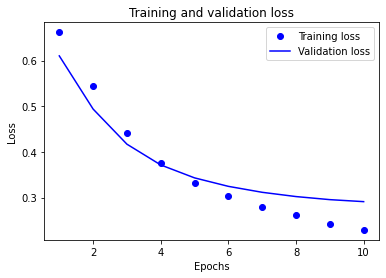

In [29]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

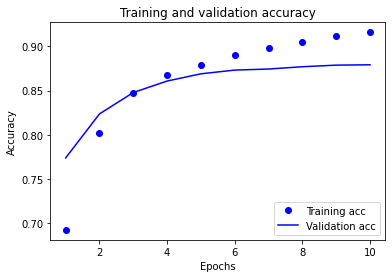

In [30]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss *decreases* with each epoch and the training accuracy *increases* with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak before the training accuracy. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations *specific* to the training data that do not *generalize* to test data.

For this particular case, you could prevent overfitting by simply stopping the training when the validation accuracy is no longer increasing. One way to do so is to use the `tf.keras.callbacks.EarlyStopping` callback.

## Export the model

In the code above, you applied the `TextVectorization` layer to the dataset before feeding text to the model. If you want to make your model capable of processing raw strings (for example, to simplify deploying it), you can include the `TextVectorization` layer inside your model. To do so, you can create a new model using the weights you just trained.

In [31]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

  1/782 [..............................] - ETA: 3:59 - loss: 0.2583 - accuracy: 0.9688

 11/782 [..............................] - ETA: 4s - loss: 0.3035 - accuracy: 0.8841  

 21/782 [..............................] - ETA: 4s - loss: 0.3083 - accuracy: 0.8793

 31/782 [>.............................] - ETA: 4s - loss: 0.3124 - accuracy: 0.8765

 41/782 [>.............................] - ETA: 3s - loss: 0.3152 - accuracy: 0.8750

 51/782 [>.............................] - ETA: 3s - loss: 0.3156 - accuracy: 0.8743

 61/782 [=>............................] - ETA: 3s - loss: 0.3158 - accuracy: 0.8737

 71/782 [=>............................] - ETA: 3s - loss: 0.3153 - accuracy: 0.8737

 81/782 [==>...........................] - ETA: 3s - loss: 0.3144 - accuracy: 0.8739

 91/782 [==>...........................] - ETA: 3s - loss: 0.3138 - accuracy: 0.8740

101/782 [==>...........................] - ETA: 3s - loss: 0.3133 - accuracy: 0.8739

111/782 [===>..........................] - ETA: 3s - loss: 0.3129 - accuracy: 0.8739

121/782 [===>..........................] - ETA: 3s - loss: 0.3127 - accuracy: 0.8737

131/782 [====>.........................] - ETA: 3s - loss: 0.3125 - accuracy: 0.8735

141/782 [====>.........................] - ETA: 3s - loss: 0.3124 - accuracy: 0.8734

150/782 [====>.........................] - ETA: 3s - loss: 0.3123 - accuracy: 0.8734

160/782 [=====>........................] - ETA: 3s - loss: 0.3121 - accuracy: 0.8734

170/782 [=====>........................] - ETA: 3s - loss: 0.3119 - accuracy: 0.8734

180/782 [=====>........................] - ETA: 3s - loss: 0.3118 - accuracy: 0.8734

190/782 [======>.......................] - ETA: 3s - loss: 0.3116 - accuracy: 0.8735

200/782 [======>.......................] - ETA: 3s - loss: 0.3113 - accuracy: 0.8736

209/782 [=======>......................] - ETA: 3s - loss: 0.3110 - accuracy: 0.8738

219/782 [=======>......................] - ETA: 2s - loss: 0.3106 - accuracy: 0.8740

229/782 [=======>......................] - ETA: 2s - loss: 0.3103 - accuracy: 0.8741

239/782 [========>.....................] - ETA: 2s - loss: 0.3100 - accuracy: 0.8743

249/782 [========>.....................] - ETA: 2s - loss: 0.3098 - accuracy: 0.8744

259/782 [========>.....................] - ETA: 2s - loss: 0.3095 - accuracy: 0.8745

269/782 [=========>....................] - ETA: 2s - loss: 0.3093 - accuracy: 0.8746

279/782 [=========>....................] - ETA: 2s - loss: 0.3091 - accuracy: 0.8747

289/782 [==========>...................] - ETA: 2s - loss: 0.3090 - accuracy: 0.8747

299/782 [==========>...................] - ETA: 2s - loss: 0.3089 - accuracy: 0.8748

309/782 [==========>...................] - ETA: 2s - loss: 0.3089 - accuracy: 0.8748

318/782 [===========>..................] - ETA: 2s - loss: 0.3088 - accuracy: 0.8748

327/782 [===========>..................] - ETA: 2s - loss: 0.3087 - accuracy: 0.8749

337/782 [===========>..................] - ETA: 2s - loss: 0.3086 - accuracy: 0.8750

347/782 [============>.................] - ETA: 2s - loss: 0.3086 - accuracy: 0.8750

357/782 [============>.................] - ETA: 2s - loss: 0.3085 - accuracy: 0.8751

367/782 [=============>................] - ETA: 2s - loss: 0.3085 - accuracy: 0.8751

376/782 [=============>................] - ETA: 2s - loss: 0.3085 - accuracy: 0.8751

385/782 [=============>................] - ETA: 2s - loss: 0.3084 - accuracy: 0.8751

394/782 [==============>...............] - ETA: 2s - loss: 0.3084 - accuracy: 0.8752

403/782 [==============>...............] - ETA: 2s - loss: 0.3084 - accuracy: 0.8752

412/782 [==============>...............] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

421/782 [===============>..............] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

430/782 [===============>..............] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

439/782 [===============>..............] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

448/782 [================>.............] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

458/782 [================>.............] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

468/782 [================>.............] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

477/782 [=================>............] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

486/782 [=================>............] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

495/782 [=================>............] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

504/782 [==================>...........] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

514/782 [==================>...........] - ETA: 1s - loss: 0.3083 - accuracy: 0.8752

523/782 [===================>..........] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

533/782 [===================>..........] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

543/782 [===================>..........] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

553/782 [====================>.........] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

563/782 [====================>.........] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

573/782 [====================>.........] - ETA: 1s - loss: 0.3084 - accuracy: 0.8752

583/782 [=====================>........] - ETA: 1s - loss: 0.3085 - accuracy: 0.8752

593/782 [=====================>........] - ETA: 1s - loss: 0.3085 - accuracy: 0.8752

603/782 [======================>.......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

613/782 [======================>.......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

623/782 [======================>.......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

633/782 [=======================>......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

643/782 [=======================>......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

653/782 [========================>.....] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

663/782 [========================>.....] - ETA: 0s - loss: 0.3085 - accuracy: 0.8751

673/782 [========================>.....] - ETA: 0s - loss: 0.3086 - accuracy: 0.8751

682/782 [=========================>....] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

691/782 [=========================>....] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

700/782 [=========================>....] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

710/782 [==========================>...] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

720/782 [==========================>...] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

729/782 [==========================>...] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

739/782 [===========================>..] - ETA: 0s - loss: 0.3087 - accuracy: 0.8750

748/782 [===========================>..] - ETA: 0s - loss: 0.3087 - accuracy: 0.8750

758/782 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8749

768/782 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8749

779/782 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8749

782/782 [==============================] - 5s 5ms/step - loss: 0.3087 - accuracy: 0.8749


0.8737199902534485


### Inference on new data

To get predictions for new examples, you can simply call `model.predict()`.

In [32]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.628366  ],
       [0.4506325 ],
       [0.36495486]], dtype=float32)

Including the text preprocessing logic inside your model enables you to export a model for production that simplifies deployment, and reduces the potential for [train/test skew](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew).

There is a performance difference to keep in mind when choosing where to apply your TextVectorization layer. Using it outside of your model enables you to do asynchronous CPU processing and buffering of your data when training on GPU. So, if you're training your model on the GPU, you probably want to go with this option to get the best performance while developing your model, then switch to including the TextVectorization layer inside your model when you're ready to prepare for deployment.

Visit this [tutorial](https://www.tensorflow.org/tutorials/keras/save_and_load) to learn more about saving models.

## Exercise: multiclass classification on Stack Overflow questions

This tutorial showed how to train a binary classifier from scratch on the IMDB dataset. As an exercise, you can modify this notebook to train a multiclass classifier to predict the tag of a programming question on [Stack Overflow](http://stackoverflow.com/).

We have prepared a [dataset](http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz) for you to use containing the body of several thousand programming questions (for example, "How can sort a dictionary by value in Python?") posted to Stack Overflow. Each of these is labeled with exactly one tag (either Python, CSharp, JavaScript, or Java). Your task is to take a question as input, and predict the appropriate tag, in this case, Python. 

The dataset you will work with contains several thousand questions extracted from the much larger public Stack Overflow dataset on [BigQuery](https://console.cloud.google.com/marketplace/details/stack-exchange/stack-overflow), which contains more than 17 million posts.

After downloading the dataset, you will find it has a similar directory structure to the IMDB dataset you worked with previously:

```
train/
...python/
......0.txt
......1.txt
...javascript/
......0.txt
......1.txt
...csharp/
......0.txt
......1.txt
...java/
......0.txt
......1.txt
```

Note: to increase the difficulty of the classification problem, we have replaced any occurences of the words Python, CSharp, JavaScript, or Java in the programming questions with the word *blank* (as many questions contain the language they're about). 

To complete this exercise, you should modify this notebook to work with the Stack Overflow dataset by making the following modifications:

1. At the top of your notebook, update the code that downloads the IMDB dataset with code to download the [Stack Overflow dataset](http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz) we have prepreared. As the Stack Overflow dataset has a similar directory structure, you will not need to make many modifications. 

1. Modify the last layer of your model to read `Dense(4)`, as there are now four output classes.

1. When you compile your model, change the loss to `losses.SparseCategoricalCrossentropy`. This is the correct loss function to use for a multiclass classification problem, when the labels for each class are integers (in our case, they can be 0, *1*, *2*, or *3*).

1. Once these changes are complete, you will be able to train a multiclass classifier. 

If you get stuck, you can find a solution [here](https://github.com/tensorflow/examples/blob/master/community/en/text_classification_solution.ipynb).


## Learning more

This tutorial introduced text classification from scratch. To learn more about the text classification workflow in general, we recommend reading [this guide](https://developers.google.com/machine-learning/guides/text-classification/) from Google Developers.
